In [1]:
import sys
import os
sys.path.insert(0, '/home/groups/rwr/alpv95/tracksml')
from ipopt import minimize_ipopt
import pickle
import numpy as np
import cvxpy as cp
import ipopt
from util.methods import *
import matplotlib.pyplot as plt
plt.style.use('/home/groups/rwr/alpv95/util/plot.mplstyle')
import torch
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from util.net_test import *
from astropy.io import fits
from astropy import stats
import scipy
import pandas as pd
from scipy.signal import savgol_filter
from scipy.optimize import minimize_scalar

%matplotlib inline
home_dir = '/home/groups/rwr/alpv95/tracksml/'

In [41]:
from matplotlib import rcParams
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

In [ ]:
with open(home_dir + "gen4_paperFIX_train___ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [ ]:
with open(home_dir + "gen4_paper_train___ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [ ]:
with open(home_dir + "gen4_paper0_train___ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [ ]:
with open(home_dir + "gen4_pl2HIGH_aug1_noshift_test___ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "final0_train___bestOG__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "gen4_pl2_aug3_hex_train___hex_pl2_unpol__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "level1_pl2_aug3_pol_train___level1_pl2_pol__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "level1_pl2_aug3_pol_full_train___level1_pl2_pol_full__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [12]:
with open(home_dir + "level1_pl2_aug3_pol_pulse_train___level1_pl2_pol_pulse__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "level1_pl2_aug3_unpol_train___level1_pl2_unpol__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "paper_pl1_pol_train___paper_pl1_pol__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "level1_pl2_aug3_unpol_full_train___level1_pl2_unpol_full__ensemble_paper.pickle","rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "final1_90_train___bestOG__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [18]:
with open(home_dir + "final0_train___alpha03_absE__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "final0_train___herman3__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [42]:
with open(home_dir + "final_5p4_unpol_train___TEST__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [47]:
with open(home_dir + "paper_unpol_train___paper_unpol2__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___bigEpol2__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [5]:
with open(home_dir + "fom_pol_big_train___flat_all_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "review_unpol_train___flat_all_unpol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [29]:
with open(home_dir + "fom_pol_big_train___pl1_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___pl1_weight_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___flat_weight_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___flat_weightE_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [3]:
x = torch.load(home_dir + "data/expanded/newpaper_pol/train/labels_full.pt")

In [11]:
x.keys()

dict_keys(['mom_phis', 'moms', 'mom_abs', 'xy_abs', 'mom_energy', 'angles', 'abs', 'energy', 'z'])

(array([746., 115., 114., 102., 106., 103., 116., 115., 125., 123., 118.,
         99.,  93., 110.,  92., 100.,  95., 104., 121., 113., 119.,  99.,
        101., 103., 117., 125., 105.,  97.,  89., 118., 109., 112.,  99.,
        111., 111., 119., 116., 101.,  96., 113., 124., 127.,  96., 129.,
        123., 120., 110.,  92., 108., 442.]),
 array([ 0.8308335,  1.0308489,  1.2308642,  1.4308795,  1.6308948,
         1.8309101,  2.0309253,  2.2309406,  2.4309561,  2.6309714,
         2.8309867,  3.031002 ,  3.2310174,  3.4310327,  3.631048 ,
         3.8310633,  4.0310783,  4.231094 ,  4.431109 ,  4.6311245,
         4.8311396,  5.031155 ,  5.2311707,  5.4311857,  5.6312013,
         5.8312163,  6.031232 ,  6.231247 ,  6.4312625,  6.6312776,
         6.831293 ,  7.031308 ,  7.2313237,  7.431339 ,  7.6313543,
         7.8313694,  8.031384 ,  8.2314005,  8.431416 ,  8.631431 ,
         8.831446 ,  9.031462 ,  9.231477 ,  9.431492 ,  9.631507 ,
         9.831523 , 10.031538 , 10.231553 , 10

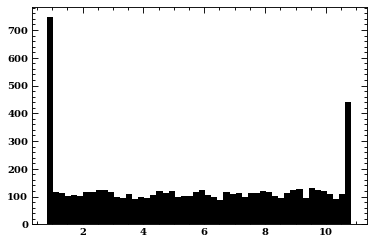

In [10]:
plt.hist(x['z'][x['energy'][:,0] == 8.0])

In [6]:
angles, angles_mom, angles_sim, moms, errors, abs_pts, mom_abs_pts, abs_pts_sim, \
energies, energies_sim, angles1, errors1, _ = A
E = set(energies_sim[:])
E = np.sort(list(E))

In [5]:
angles.shape

(2210400, 3, 15)

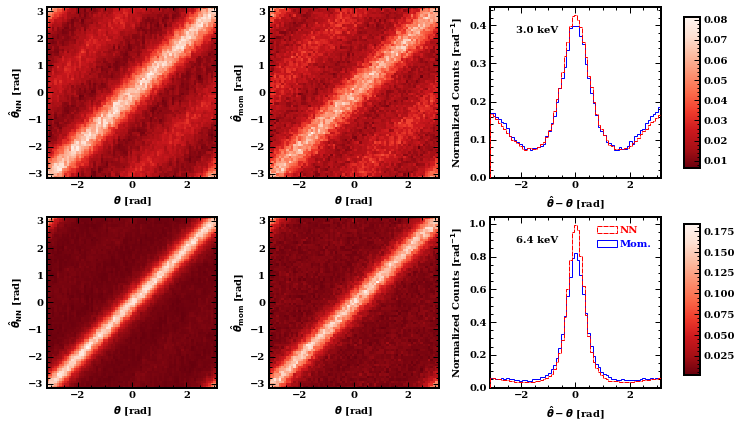

In [26]:
name = "confusion_matrix"
e = [(3.0,3.1),(6.4,6.5)]
fig, ax = plt.subplots(figsize=(11,7.0),ncols=3, nrows=2,gridspec_kw={"hspace":0.23,"wspace":0.3})
axs = [ax.flat[:3],ax.flat[3:]]
for i in range(2):
    e1,e2 = e[i]
    ax1,ax2,ax3 = axs[i]
    
    cut = (e1 <= energies_sim) * (energies_sim <= e2)

    sim = np.ndarray.flatten(np.tile(np.expand_dims(np.tile(np.expand_dims(angles_sim[cut],-1),3),-1),15))
    mom = np.ndarray.flatten(np.tile(np.expand_dims(np.tile(np.expand_dims(angles_mom[cut],-1),3),-1),15))
    
    trck = ax1.hist2d(sim,np.ndarray.flatten(angles[cut,:,:]), bins=70,cmap="Reds_r",normed=True)
#     ax1.axvline(a[0],color="k",ls="--")
#     ax1.axvline(a[1],color="k",ls="--")
    ax1.set_xlabel(r"$\theta$ [rad]",fontweight="bold")
    ax1.set_ylabel(r"$\hat{\theta}_{\rm NN}$ [rad]",fontweight="bold")

    ax2.hist2d(angles_sim[cut], angles_mom[cut], bins=70,cmap="Reds_r",normed=True)
#     ax2.axvline(a[0],color="k",ls="--")
#     ax2.axvline(a[1],color="k",ls="--")
    ax2.set_xlabel(r"$\theta$ [rad]",fontweight="bold")
    ax2.set_ylabel(r"$\hat{\theta}_{\rm mom}$ [rad]",fontweight="bold")
        
    histNN = []
    histMom = []
    for a1,a2 in pairwise(np.linspace(-np.pi,np.pi,300)):
        histNN.append(pi_pi(np.ndarray.flatten(angles[cut,:,:])[(sim <= a2) * (sim >= a1)] - (a1 + a2)/2 ))
        histMom.append(pi_pi(angles_mom[cut * (angles_sim <= a2) * (angles_sim >= a1)] - (a1 + a2)/2))

    ax3.hist(np.concatenate(histNN), bins=65,density=True,
             color="r",histtype="step",zorder=10,ls=(0, (5, 1)),label="NN")
    ax3.hist(np.concatenate(histMom), bins=65,density=True,
             color="b",histtype="step",label="Mom.")
#     ax3.axvline(a[0],color="k",ls="--")
#     ax3.axvline(a[1],color="k",ls="--")
    ax3.annotate(r"{} keV".format(e1), xy=(0.15, 0.85), xycoords='axes fraction')
    ax3.set_xlabel(r"$\hat{\theta} - \theta$ [rad]",fontweight="bold")
    ax3.set_ylabel(r"Normalized Counts [rad$^{-1}$]",fontweight="bold")
    ax3.set_xlim(-np.pi,np.pi)
    

    cb_ax = fig.add_axes([0.93, 0.56 - i*0.41, 0.02, 0.3])
    cbar = fig.colorbar(trck[3], cax=cb_ax)
    
leg = ax3.legend(loc = 1,)
for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

## Energy Resolution

In [28]:
tracks_cum,angles_cum,_,_,_,_,energy_cum = torch.load(home_dir + "data/expanded/gen4_old/test/data_full.pt")
tracks_cum1,angles_cum,_,_,_,_,energy_cum1 = torch.load(home_dir + "data/expanded/gen4_old/val/data_full.pt")


In [29]:
pha = np.concatenate([np.sum(tracks_cum[:,0,0,:,:].numpy(),axis=(-2,-1)),
                    np.sum(tracks_cum1[:,0,0,:,:].numpy(),axis=(-2,-1))])
energy = np.concatenate([energy_cum[:,0].numpy(),energy_cum1[:,0].numpy()])

In [30]:
pha_list = []
energy_list = []
for e in np.sort(list(set(energy))):
    med = np.median(pha[energy == e])
    dev = stats.median_absolute_deviation(pha[energy == e])
    cut = (pha[energy == e] > med - 1.4*dev) * (pha[energy == e] < med + 1.4*dev)
    pha_list.extend(list(pha[energy == e][cut]))
    energy_list.extend([e]*len(list(pha[energy == e][cut])))
pha = np.array(pha_list)
energy = np.array(energy_list)

In [31]:
pha.shape

(63483,)

In [182]:
import cvxpy as cp

In [33]:
#Huber Regression
M = 0.25
m = len(pha)
n = 2
np.random.seed(1)
#q = 2*M*np.ones(m)
#P = np.eye(length)
A = np.stack([pha,np.ones(len(pha))]).T
b = energy

np.linalg.lstsq(A,b)
# Define and solve the CVXPY problem.
#u = cp.Variable(m)
#v = cp.Variable(m)
# x = cp.Variable(n)
# #constraints = [u+v >= A@x - b, -u-v <= A@x - b, u >= 0, u <= M*np.ones(m), v >= 0]

# prob = cp.Problem(cp.Minimize(cp.sum(cp.huber(A@x - b, M))))
# prob.solve()

# # Print result.
# print("\nThe optimal value is", prob.value)
# print("A solution x is")
# print(x.value)

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


(array([0.00029483, 0.05735115]),
 array([3630.41562774]),
 2,
 array([4.45090362e+06, 8.84536856e+01]))

In [9]:
beta_ls = np.array([0.00029483, 0.05735115])

In [37]:
beta = np.array([0.00029353, 0.06787126])

In [4]:
with open(home_dir+ "data/expanded/fom_pol_big/train/" + "tracks_full.pickle", "rb") as f:
    tracks_all = pickle.load(f)

In [5]:
_,_,_,_,_,energy_cum = torch.load(home_dir + "data/expanded/fom_pol_big/train/labels_full.pt")

In [9]:
energy_test = energy_cum[:,0].numpy()

In [7]:
pha_test = []
for i in range(len(tracks_all)):
    pha_test.append(np.sum(tracks_all[i][0,0,2,:].numpy()))
pha_test = np.array(pha_test)

In [4]:
pha_test,energy_test = np.load("PHAs.npy")
beta_ls = np.array([0.00029483, 0.05735115])
energy_pred = pha_test*beta_ls[0] + beta_ls[1]

In [6]:
pha_test.shape

(2210400,)

(array([0.00607958, 0.00822531, 0.01215916, 0.01072867, 0.01251678,
        0.01466252, 0.0128744 , 0.01680825, 0.01072868, 0.01358964,
        0.01394726, 0.01645064, 0.01573537, 0.01645064, 0.01358964,
        0.02002686, 0.02002684, 0.01931162, 0.02145735, 0.02288782,
        0.02932502, 0.02610642, 0.03182845, 0.02503355, 0.03755033,
        0.04756375, 0.04363   , 0.0565043 , 0.06186863, 0.06437199,
        0.06401436, 0.08475665, 0.11586957, 0.18989736, 0.29146205,
        0.38515996, 0.53571797, 0.59079318, 0.58077836, 0.50532009,
        0.37156941, 0.24997788, 0.1308897 , 0.07009394, 0.0339741 ,
        0.01394733, 0.00250336, 0.00143049, 0.        , 0.00107287]),
 array([ 0.32151884,  0.52389604,  0.72627324,  0.92865044,  1.1310277 ,
         1.3334049 ,  1.5357821 ,  1.7381593 ,  1.9405365 ,  2.1429136 ,
         2.345291  ,  2.5476682 ,  2.7500453 ,  2.9524226 ,  3.1547997 ,
         3.357177  ,  3.559554  ,  3.7619314 ,  3.9643085 ,  4.1666856 ,
         4.369063  ,  4.57

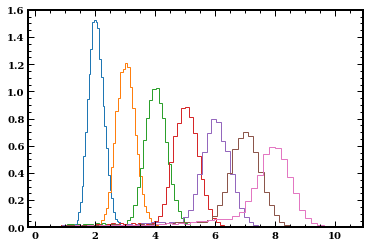

In [41]:
plt.hist(pha_test[energy_test == 2.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 3.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 4.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 5.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 6.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 7.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 8.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")

In [5]:
def mad(sample,side=1):
    med = np.median(sample)
    res = sample - med 
    if side > 0:
        out = np.median(res[res >= 0])
    elif side < 0:
        out = abs(np.median(res[res <= 0]))
    else:
        out = np.median(abs(res))
    return out

In [6]:
def fwhm(sample):
    n, bins, _ = plt.hist(sample,bins=160,density=True)
    plt.clf()
    mx = np.max(n)
    return np.sum((n >= mx/2) * abs(bins[1] - bins[2]))

In [7]:
def mode(sample):
    n, bins, _ = plt.hist(sample,bins=160,density=True)
    plt.clf()
    mx = np.argmax(n)
    return bins[mx]

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


Text(0.5,0,'E [keV]')

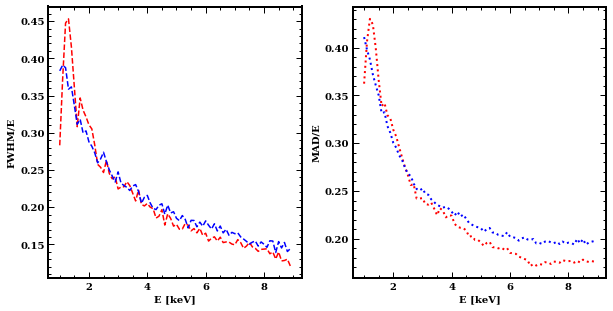

In [102]:
NN = []
NN_l1 = []
NN_mad = []
NN_med = []
mom = []
mom_l1 = []
mom_mad = []
mom_med = []
for e in np.sort(list(set(energies_sim))):
    if e <= 2.5:
        side = 0
    elif e <= 4.5:
        side = -1
    else:
        side= 0
    cut_nn = (energies_sim == e)
    NN.append(np.sqrt(np.mean((energies[cut_nn] - energies_sim[cut_nn])**2)))
    NN_l1.append(np.sqrt(np.mean(abs(energies[cut_nn] - energies_sim[cut_nn]))))
    if e >= 6.6:
        hist = highE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    elif e <= 1.5:
        hist = lowE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    else:
        hist = energies[cut_nn]
    NN_med.append(3.46 * mad(hist,side) / e)
    NN_mad.append(fwhm(hist)/e)
    #NN_med.append(mode(energies[cut_nn]))
    
for e in np.sort(list(set(energy_test))):
    if e <= 2.5:
        side = 0
    elif e <= 4.5:
        side = -1
    else:
        side= 0
    cut_mom = (energy_test == e)
    mom.append(np.sqrt(np.mean((energy_pred[cut_mom] - energy_test[cut_mom])**2)))
    mom_l1.append(np.sqrt(np.mean(abs(energy_pred[cut_mom] - energy_test[cut_mom]))))
    mom_med.append(3.46 * mad(energy_pred[cut_mom],side) / e)
    mom_mad.append(fwhm(energy_pred[cut_mom])/e)
    #mom_med.append(mode(energy_pred[cut_mom]))
    
fig,(ax3,ax4) = plt.subplots(figsize=(10,5),ncols=2)
# ax1.plot(np.sort(list(set(energies_sim))), NN,'r')
# ax1.plot(np.sort(list(set(energy_test))), mom, 'b')
# ax1.set_ylabel("RMSE",fontweight="bold")
# ax1.set_xlabel("E [keV]",fontweight="bold")

# ax2.plot(np.sort(list(set(energies_sim))), NN_l1,'r')
# ax2.plot(np.sort(list(set(energy_test))), mom_l1, 'b')
# ax2.set_ylabel("RMAE",fontweight="bold")
# ax2.set_xlabel("E [keV]",fontweight="bold")

ax3.plot(np.sort(list(set(energies_sim))), NN_mad,'r--')
ax3.plot(np.sort(list(set(energy_test))), mom_mad, 'b--')
ax3.set_ylabel("FWHM/E",fontweight="bold")
ax3.set_xlabel("E [keV]",fontweight="bold")

ax4.plot(np.sort(list(set(energies_sim))), NN_med,'r:', linewidth=2)
ax4.plot(np.sort(list(set(energy_test))), mom_med, 'b:', linewidth=2)
#ax4.plot(np.sort(list(set(energy_test))), np.sort(list(set(energy_test))), 'k')
ax4.set_ylabel("MAD/E",fontweight="bold")
ax4.set_xlabel("E [keV]",fontweight="bold")

In [6]:
def highE_correct(pred):
    """
    E >= 6.8
    """
    e2,e1,e0 = -0.08390193750064412, 1.1390039077295535, -3.8988187828682386
    return (-(e1+1) + np.sqrt((e1+1)**2 - 4*e2*(e0 - pred))) / (2 * e2)

In [7]:
def lowE_correct(pred):
    """
     1.03 <= E <= 1.4
    """
    e2,e1,e0 = 0.4810610473959431, -1.4948961933283693, 1.1567350041938906
    return (-(e1+1) + np.sqrt((e1+1)**2 - 4*e2*(e0 - pred))) / (2 * e2)

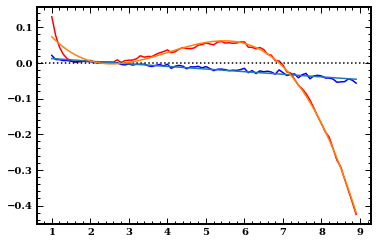

In [10]:
medians = []
medians_mom = []
for e in E:
    cut_nn = (energies_sim == e)
    med = np.median(energies[cut_nn])
    dev = stats.median_absolute_deviation(energies[cut_nn])
    cut_q = (energies[cut_nn] > med - 3.5*dev) * (energies[cut_nn] < med + 3.5*dev)
    medians.append(np.median(energies[cut_nn][cut_q]) - e)
    
    cut_mom = (energy_test == e)
    med = np.median(energy_pred[cut_mom])
    dev = stats.median_absolute_deviation(energy_pred[cut_mom])
    cut_q = (energy_pred[cut_mom] > med - 3.5*dev) * (energy_pred[cut_mom] < med + 3.5*dev)
    medians_mom.append(np.median(energy_pred[cut_mom][cut_q]) - e)
    
plt.plot(E,medians,"r")
plt.plot(E,medians_mom,"b")
plt.axhline(0,ls=":",color="k")
e1, e0 = np.polyfit(E,medians_mom,1)
plt.plot(E,e0 + e1*E)
e3, e2, e1, e0 = np.polyfit(E,medians,3)
plt.plot(E,e0 + e1*E + e2*E**2 + e3*E**3)

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


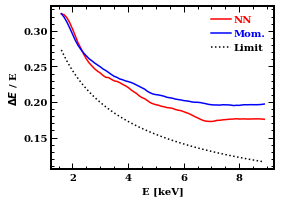

In [17]:
fig, ax1 = plt.subplots(figsize=(4.0,3.0))
NN = []
mom = []
for e in np.sort(list(set(energies_sim)))[6:]:
    cut_nn = (energies_sim == e)
    if e <= 4.5:
        side = -1
    else:
        side= 0
        
    if e >= 6.6:
        hist = highE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    elif e <= 1.5:
        hist = lowE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    else:
        hist = energies[cut_nn]

    NN.append(mad(hist,side))
    mom.append(mad(energy_pred[cut_nn],side))
ax1.plot(np.sort(list(set(energy_test)))[6:], 3.455*savgol_filter(NN[:] / np.sort(list(set(energy_test)))[6:],11,3),"r",label="NN",linewidth=1.5,)
ax1.plot(np.sort(list(set(energy_test)))[6:], 3.455*savgol_filter(mom[:] / np.sort(list(set(energy_test)))[6:],11,3),"b",label="Mom.",linewidth=1.5,)
ax1.plot(np.sort(list(set(energy_test)))[6:],0.1*3.455*np.sort(list(set(energy_test)))[6:]**0.5 / np.sort(list(set(energy_test)))[6:],color='k',linestyle=':', label="Limit")
ax1.set_xlabel("E [keV]",fontweight="bold")
ax1.set_ylabel(r"$\Delta E$ / E",fontweight="bold")
leg = ax1.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
plt.savefig("plots/" + "energy_mad" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


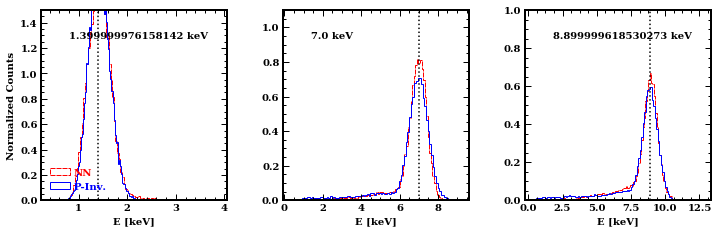

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,3.5),ncols=3,gridspec_kw={"wspace":0.3})#sharex=True,gridspec_kw={"hspace":0.0})
#for jdx,ax in enumerate(ax.flat):

e = E[4]
cut_nn = (energies_sim == e)
x = lowE_correct(energies[cut_nn])
ax1.hist(x[~np.isnan(x)],bins=100, density=True,color="r", label="NN",histtype="step",ls=(0, (5, 1)))
ax1.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step", label="P-Inv.")
ax1.set_xlabel(r"E [keV]",fontweight="bold")
ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax1.axvline(e,color='k',linestyle=':')
ax1.set_ylim(0.0,1.5)
ax1.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')
leg = ax1.legend(loc = 3)
# leg = ax1.legend(loc = 1,)
# for line, text in zip(leg.get_lines(), leg.get_texts()):
#     text.set_color(line.get_color())

e = 7.0
cut_nn = (energies_sim == e)
ax2.hist(energies[cut_nn],bins=100, density=True,color="r",histtype="step",ls=(0, (5, 1)))
ax2.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step")
ax2.set_xlabel(r"E [keV]",fontweight="bold")
#ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.axvline(e,color='k',linestyle=':')
ax2.set_ylim(0.0,1.1)
ax2.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')

e = E[-1]
cut_nn = (energies_sim == e)
x = highE_correct(energies[cut_nn])
ax3.hist(x[~np.isnan(x)],bins=100, density=True,color="r",histtype="step",ls=(0, (5, 1)))
ax3.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step")
ax3.set_xlabel(r"E [keV]",fontweight="bold")
ax3.axvline(e,color='k',linestyle=':')
ax3.set_ylim(0.0,1.0)
ax3.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')
#USE FWHM, can fit gaussian
#ax3.set_ylabel(r"Normalized Counts",fontweight="bold")

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

#plt.savefig("plots/" + "energy_ehist" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

# Energy Tail vs Peak

In [13]:
def mse(theta_hat,theta):
    return np.sqrt(np.sum((np.cos(2*theta) - np.cos(2*theta_hat))**2 + (np.sin(2*theta) - np.sin(2*theta_hat))**2) / len(theta))

In [34]:
x = torch.load(home_dir + "data/expanded/meas_2p3_pol/train/labels_full.pt")

In [35]:
x['trg_id']

tensor([   1,    2,    3,  ..., 8499, 8500, 8501], dtype=torch.int32)

In [46]:
with fits.open(home_dir + "newpaper_pol_train___newpaper_pol__ensemble.fits", memmap=False) as hdu:
    data = hdu[1].data

In [60]:
'NN_PH2I' in [x.name for x in data.columns]

False

(38922,)
(38922,)


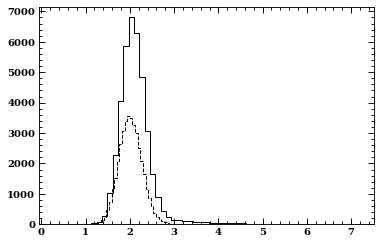

In [54]:
e = 2.0
plt.hist(data['NN_ENERGY'][data['ENERGY'] == e], histtype='step')
plt.hist(data['MOM_ENERGY'][data['ENERGY'] == e], histtype='step')
print(data['NN_ENERGY'][data['ENERGY'] == e].shape)
print(data['MOM_ENERGY'][data['ENERGY'] == e].shape)

In [44]:
data['TRG_ID']

array([   1,    2,    3, ..., 8499, 8500, 8501], dtype=int32)

In [23]:
input_file = home_dir + "data/TEST/gen4_2p3_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    print(hdu[1].header)
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
#     print(hdu[3].header)
    sim_data = hdu[3].data
    
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
Z = sim_data["ABS_Z"][cut]
PHA = data["PHA"][cut]
X = data['PIX_X'][cut]
Y = data['PIX_Y'][cut]
C = data['PIX_PHA'][cut]
THETA = sim_data['PE_PHI'][cut]
THETA_HAT = data['DETPHI'][cut]
print(mse(THETA,THETA_HAT), " Total MSE")

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                 4150 / width of table in bytes                        NAXIS2  =                10000 / number of rows in table                        PCOUNT  =             21568416 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                   40 / number of fields in each row                   TTYPE1  = 'PAKTNUMB'           / label for field   1                            TFORM1  = '1J      '           / data format of field: 4-byte INTEGER           TUNIT1  = '        '           / physical unit of field                         TTYPE2  = 'TRG_ID  '           / label for field   2                            TFORM2  = '1J      '           / data fo

NameError: name 'mse' is not defined

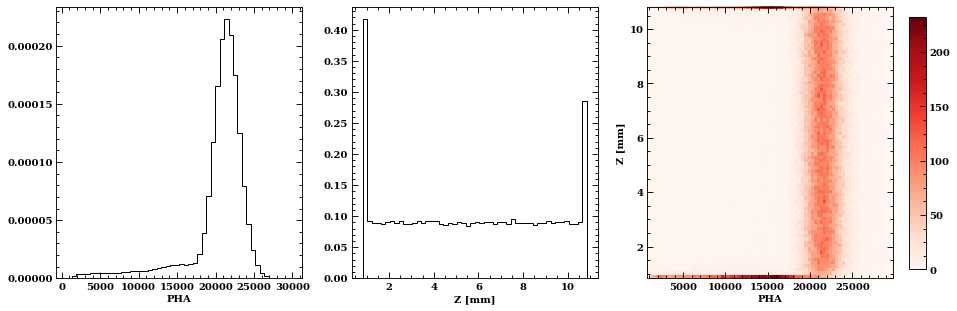

In [101]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(15,5),ncols=3)
ax2.hist(Z,density=True,histtype="step")
ax2.set_xlabel("Z [mm]")
ax1.hist(PHA,density=True,histtype="step")
ax1.set_xlabel("PHA")
im = ax3.hist2d(PHA,Z,bins=80, cmap="Reds")
ax3.set_xlabel("PHA")
ax3.set_ylabel("Z [mm]")
# ax3.axhline(10.7)
# ax3.axhline(1)
# ax3.axvline(19000)
cb_ax = fig.add_axes([0.915, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im[3], cax=cb_ax)

1.3094570067673834  High Z
1.3631888716011595  Low Z
0.9222010024990392  Peak


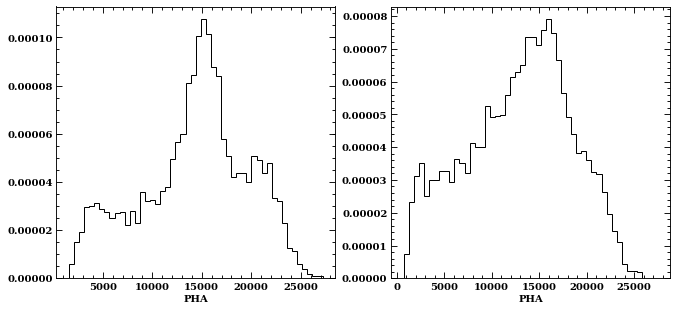

In [102]:
high = 10.7
low = 1
pha_cut = 19000

fig,(ax1,ax2,) = plt.subplots(figsize=(11,5),ncols=2)
ax1.hist(PHA[Z>high],density=True,histtype="step")
print(mse(THETA_HAT[(Z>high)*(PHA<pha_cut)],THETA[(Z>high)*(PHA<pha_cut)])," High Z")
ax1.set_xlabel("PHA")
ax2.hist(PHA[Z<low],density=True,histtype="step")
print(mse(THETA_HAT[(Z<low)*(PHA<pha_cut)],THETA[(Z<low)*(PHA<pha_cut)])," Low Z")
ax2.set_xlabel("PHA")
print(mse(THETA_HAT[(Z>low)*(Z<high)*(PHA>pha_cut)],THETA[(Z>low)*(Z<high)*(PHA>pha_cut)])," Peak")

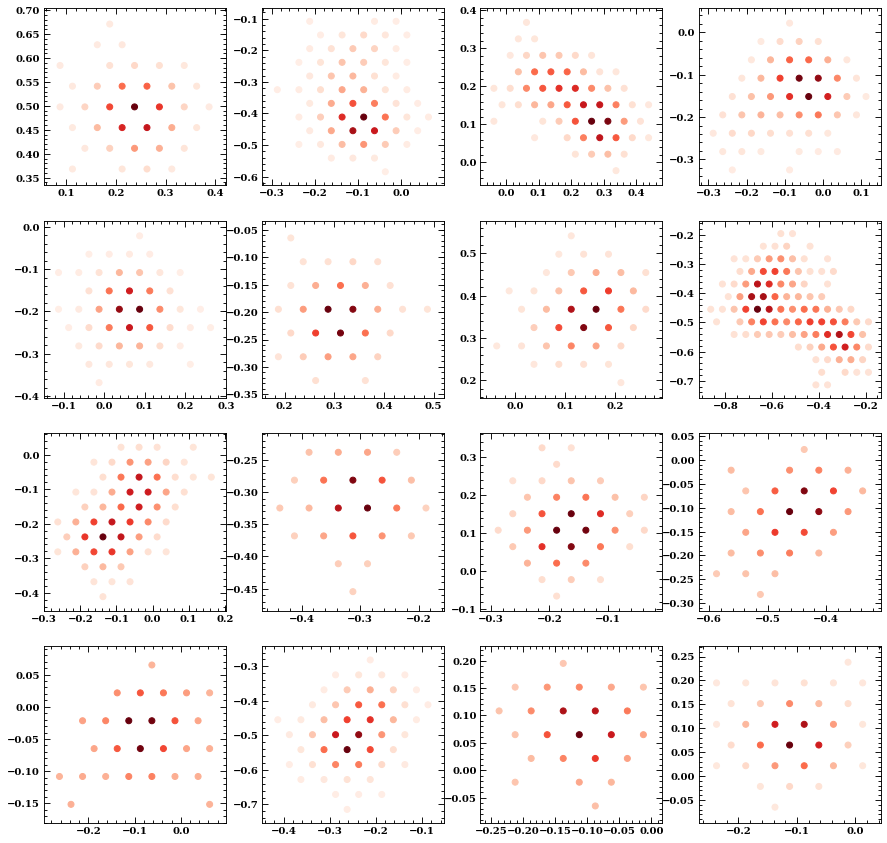

In [59]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = (PHA < 15000) * (Z < 1) 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

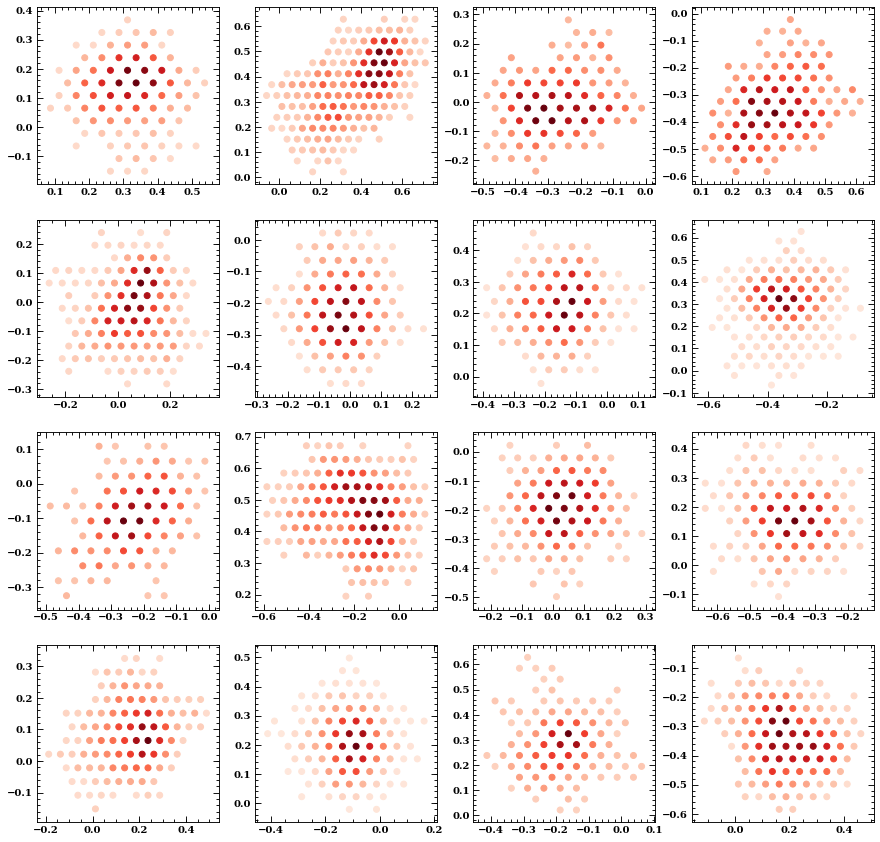

In [60]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = (PHA < 15000) * (Z > 10.5) 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

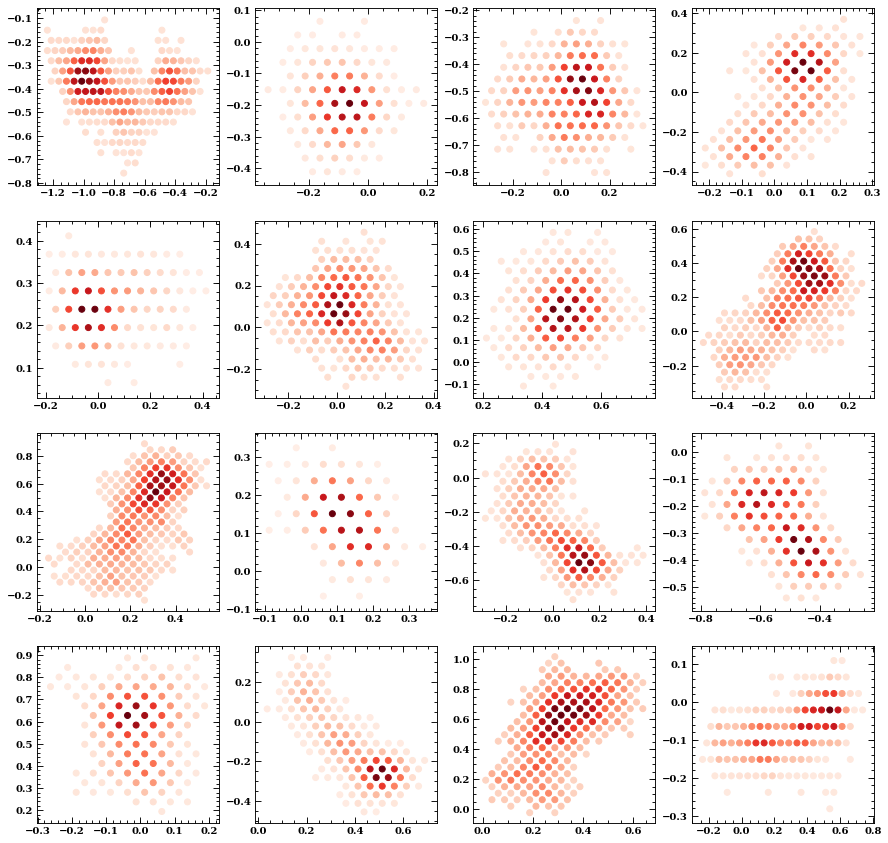

In [51]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = PHA > 19000 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

# Tracks

In [26]:
input_file = home_dir + "data/training733/gen4_9p5_recon.fits"
with fits.open(input_file, memmap=False) as hdu:
    #print(hdu[1].header)
    data1 = hdu[1].data
    print(data1["DETPHI"].shape)
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    #print(hdu[3].header)
    sim_data1 = hdu[3].data

(100000,)


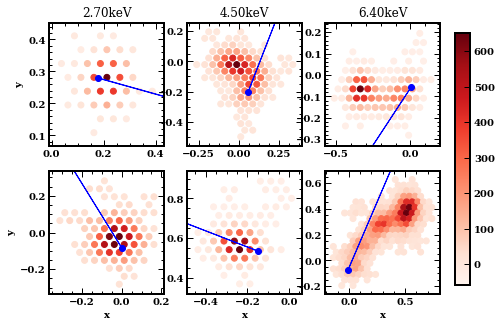

In [171]:
name = "hex6"
fig, ax = plt.subplots(figsize=(7,5),ncols=3,nrows=2)#sharex=True,gridspec_kw={"hspace":0.0})
for jdx,ax in enumerate(ax.flat):
    tdx = 4000 +jdx
    
    if jdx == 0 or jdx == 3:
        input_file = home_dir + "data/gen4/gen4_2p7_recon.fits"
    elif jdx == 1 or jdx == 4:
        input_file = home_dir + "data/gen4/gen4_4p5_recon.fits"
    elif jdx ==2 or jdx == 5:
        input_file = home_dir + "data/gen4/gen4_6p4_recon.fits"
#     elif jdx == 2:
#         input_file = home_dir + "real_data/5.89keV_unpol.lv1_recon.fits"
#     else:
#         input_file = home_dir + "real_data/2.70keV_unpol.lv1_recon.fits"
        
    with fits.open(input_file, memmap=False) as hdu:
        data = hdu[1].data
    with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
        sim_data = hdu[3].data
    cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
    moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
    mom_abs_pts = np.column_stack((data['DETX'],data['DETY']))[cut]
    bars = np.column_stack((data['BARX'],data['BARY']))[cut]
    
    if jdx < 2:
        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
        abs_pts = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        
    
    #plt.subplot(2,2,jdx)
    ax.minorticks_on()
    trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
               ,vmin=-60)
    
    if jdx == 0:
        ax.set_title("{:.2f}keV".format(2.7))
    if jdx == 1:
        ax.set_title("{:.2f}keV".format(4.5))
    if jdx == 2:
        ax.set_title("{:.2f}keV".format(6.4))
        
        
    if jdx > 2:
        ax.set_xlabel("x",fontweight="bold")
    if jdx == 0 or jdx == 3:
        ax.set_ylabel("y",fontweight="bold")
    
#     if jdx < 2:
#         #ax[jdx].colorbar()
    abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
    mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
    ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
    #plt.title("{:.4f}".format(sim_data['PE_PHI'][cut][tdx]))
    ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
    #plt.scatter(mom_abs_scatter[tdx,0],mom_abs_scatter[tdx,1],c='g')

cb_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
cbar = fig.colorbar(trck, cax=cb_ax)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=1.0,bbox_inches="tight")
    

In [51]:
tracks_cum, angles_cum, moms_cum, mom_phis_cum, abs_cum, mom_abs_cum, energy_cum = torch.load(home_dir + "data/expanded/paper_plot/train/data_full.pt")

In [53]:
tracks_cum.shape

torch.Size([10000, 3, 2, 30, 30])

(0.125, 0.5368181818181819, 0.35227272727272724, 0.34318181818181814)


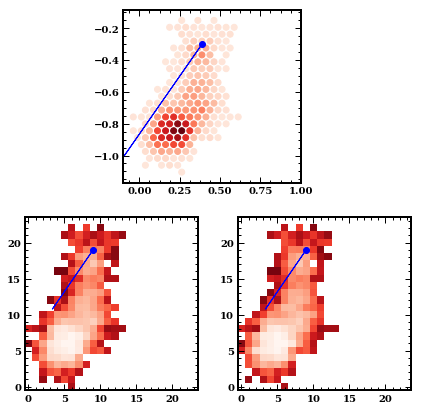

In [52]:
name = "square3"
fig, ax = plt.subplots(figsize=(7,7),ncols=2,nrows=2)#sharex=True,gridspec_kw={"hspace":0.0})
for jdx,ax in enumerate(ax.flat):
    if jdx == 1:
        ax.axis("off")
        continue
    if jdx == 0:
        print(ax.get_position().bounds)
        ax.set_position([0.125+0.2, 0.5368181818181819, 0.35227272727272724, 0.34318181818181814])
        tdx = 45138 +jdx

        input_file = home_dir + "data/gen4/gen4_6p4_recon.fits"

        with fits.open(input_file, memmap=False) as hdu:
            data = hdu[1].data
        with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
            sim_data = hdu[3].data
        cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        mom_abs_pts = np.column_stack((data['DETX'],data['DETY']))[cut]
        bars = np.column_stack((data['BARX'],data['BARY']))[cut]


        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
        abs_pts = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]


        #plt.subplot(2,2,jdx)
        ax.minorticks_on()
        trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
                   ,vmin=-60)

    #     if jdx == 0:
    #         ax.set_title("{:.2f}keV".format(5.9))
    #     if jdx == 1:
    #         ax.set_title("{:.2f}keV".format(2.7))
    #     if jdx > 1:
    #         ax.set_xlabel("x",fontweight="bold")
    #     if jdx == 0 or jdx == 2:
    #         ax.set_ylabel("y",fontweight="bold")

    #     if jdx < 2:
        abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
        ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
        ax.set_xlim(-0.1,1.0)
        #ax.set_title("$\epsilon = ${:.2f}".format(moms[tdx]))
        #ax.set_title("{:.2f}keV".format(energy_cum[60,0]))
        #plt.title("{:.4f}".format(sim_data['PE_PHI'][cut][tdx]))
        ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
        #plt.scatter(mom_abs_scatter[tdx,0],mom_abs_scatter[tdx,1],c='g')
        
    if jdx == 2:
        tdx = 6611 #35043
#         ax.subplot(3,2,2*jdx+1)
        ax.imshow(tracks_cum[tdx,0,0,:24,:24], norm=LogNorm(vmin=5,vmax=600),origin='lower', cmap="Reds_r")
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        #plt.scatter(mom_abs_cum.numpy()[tdx,0,0,0],mom_abs_cum.numpy()[tdx,0,0,1], c='g')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
        #ax.set_title("$\epsilon = ${:.2f}".format(moms_cum[tdx,0]))
        #ax.set_title("{:.2f}keV".format(energy_cum[tdx,0]))
        ax.minorticks_on()
    elif jdx == 3:
        tdx = 6611
#     plt.subplot(3,2,2*jdx+2)
        ax.imshow(tracks_cum[tdx,0,1,:24,:24], norm=LogNorm(vmin=5,vmax=600), origin='lower', cmap="Reds_r")
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
        #ax.set_title("$\epsilon = ${:.2f}".format(moms_cum[tdx,0]))
        ax.minorticks_on()
    #plt.scatter(abs_cum.numpy()[tdx,1,0],abs_cum.numpy()[tdx,1,1], c='r')
    #plt.scatter(mom_abs_cum.numpy()[tdx,1,0],mom_abs_cum.numpy()[tdx,1,1], c='g')
    #plt.arrow(abs_cum.numpy()[tdx,1,0],abs_cum.numpy()[tdx,1,1],10 * np.cos(angles_cum[tdx,1]), 10 * np.sin(angles_cum[tdx,1]),color='r')
    #plt.title("{:.2f}".format(energy_cum[tdx,1]))
        

#cb_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
#cbar = fig.colorbar(trck, cax=cb_ax)
#plt.savefig("plots/" + name + ".pdf",format="pdf")

In [5]:
import matplotlib.gridspec as gridspec

In [13]:
angles_cum, moms_cum, mom_phis_cum, abs_cum, mom_abs_cum, energy_cum, _ = torch.load(home_dir + "data/expanded/paper_plot733/train/labels_full.pt")
with open(home_dir + "data/expanded/paper_plot733/train/tracks_full.pickle", "rb") as file:
        tracks_cum = pickle.load(file)

track = torch.stack([
    torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()])
])        
        


In [28]:
from IPython import display
import time

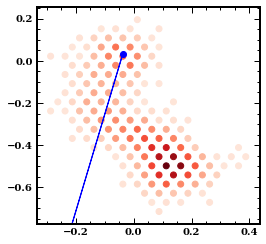

In [43]:
input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    sim_data = hdu[3].data
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]


cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

fig, ax = plt.subplots(figsize=(4,4))
for tdx in [13]:
    print(tdx)
    ax.cla()
    trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
               ,vmin=-60)

    abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
    mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
    ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
    #ax.set_xlim(-0.1,0.9)
    ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
    display.clear_output(wait=True)
    

In [39]:
sparse = tracks_cum[np.argmin(abs(moms_cum[:,0] - moms[13]))]
n_pixels = 50
track = torch.stack([
    torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()])
])    

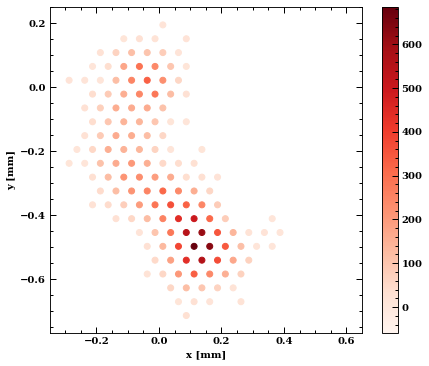

In [7]:
name = "Martin2"
fig, ax = plt.subplots(figsize=(7,6))
tdx = 13
input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    sim_data = hdu[3].data
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
           ,vmin=-60)

abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
# ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
ax.set_xlim(-0.35,0.65)
ax.set_xlabel("x [mm]",fontweight="bold")
ax.set_ylabel("y [mm]",fontweight="bold")
# ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
cbar = fig.colorbar(trck)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

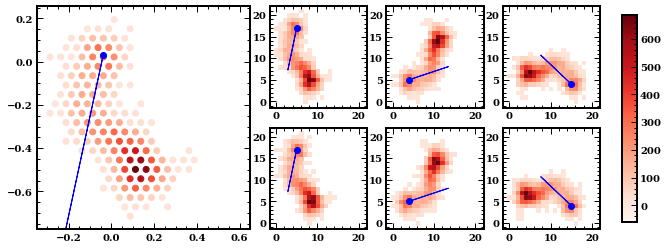

In [83]:
name = "square7"

fig = plt.figure(figsize=(10.1,4.1))
gs = gridspec.GridSpec(2, 5, hspace=0.2,wspace=0.2)
ax1 = fig.add_subplot(gs[:, :2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])
ax5 = fig.add_subplot(gs[1, 4])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

axs = [ax1,ax2,ax6,ax3,ax7,ax4,ax5]

for jdx,ax in enumerate(axs):
    if jdx == 0:
        tdx = 13 + jdx
        input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

        with fits.open(input_file, memmap=False) as hdu:
            data = hdu[1].data
        with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
            sim_data = hdu[3].data
        cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

        trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
                   ,vmin=-60)
        
        abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
        ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
        ax.set_xlim(-0.35,0.65)
        ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
        
        tdx = np.argmin(abs(moms_cum[:,0] - moms[13]))
        sparse = tracks_cum[tdx]
        n_pixels = 50
        track = torch.stack([
            torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
            torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
            torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()])
        ])    

        
    elif jdx ==1 or jdx==2:
        #ax.imshow(track[0,jdx-1,:24,:24], norm=LogNorm(vmin=5,vmax=600),origin='lower', cmap="Reds")
        ax.scatter(sparse[0,jdx-1,1,:],sparse[0,jdx-1,0,:],c=sparse[0,jdx-1,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
    elif jdx ==3 or jdx ==4:
        #ax.imshow(track[1,jdx-3,:24,:24], origin='lower', cmap="Reds")
        ax.scatter(sparse[1,jdx-3,1,:],sparse[1,jdx-3,0,:],c=sparse[1,jdx-3,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,1,0,0],abs_cum.numpy()[tdx,1,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,1,0,0],abs_cum.numpy()[tdx,1,0,1],10 * np.cos(angles_cum[tdx,1]), 10 * np.sin(angles_cum[tdx,1]),color='b')
    elif jdx ==5 or jdx==6:
        #ax.imshow(track[2,jdx-5,:24,:24], norm=LogNorm(vmin=5,vmax=600), origin='lower', cmap="Reds")
        ax.scatter(sparse[2,jdx-5,1,:],sparse[2,jdx-5,0,:],c=sparse[2,jdx-5,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,2,0,0],abs_cum.numpy()[tdx,2,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,2,0,0],abs_cum.numpy()[tdx,2,0,1],10 * np.cos(angles_cum[tdx,2]), 10 * np.sin(angles_cum[tdx,2]),color='b')
        
cb_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = fig.colorbar(trck, cax=cb_ax)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=1.0,bbox_inches="tight")

In [175]:
def binary_search(dist, centre, ci=0.67, eps=1e-3):
    N = len(dist)
    bounds = [centre,centre]
    n = 0
    while n <= ci*N:
        upper = np.sum((dist <= bounds[1] + eps) * (dist >= bounds[1]))
        lower = np.sum((dist >= bounds[0] - eps) * (dist <= bounds[0]))
        if upper > lower or bounds[0] <= 0:
            bounds[1] += eps
        else:
            bounds[0] -= eps
        n = np.sum((dist >= bounds[0])*(dist <= bounds[1]))    
    return bounds[1]
    
    

In [276]:
pi0[-1] = np.array(pi0)[-1] + 0.022
CI[-1] += 0.022

In [277]:
pi0[-2] = np.array(pi0)[-2] + 0.008
CI[-2] += 0.008

In [278]:
pi0 = [p - 0.033 for p in pi0]

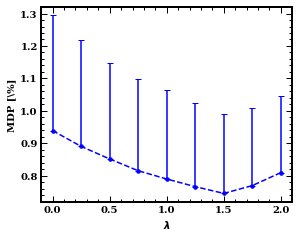

In [279]:
pi1 = [0.2536,0.2676,0.2807,0.2958,0.3108,0.3298,0.3539,0.374,0.4003]
plt.figure(figsize=(4.5,3.6))
plt.errorbar([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],(np.array(pi0)/np.array(pi1)),
         yerr=[(np.array(pi0)/np.array(pi1))*0,(np.array(CI)[:]/np.array(pi1)) - (np.array(pi0)/np.array(pi1))],color="b",linestyle='--',marker="o",markersize=3.5 ) 
#plt.plot([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],pi0)
plt.ylabel(r"MDP [\%]",fontweight="bold")
#plt.ylim(0.008,0.009)
plt.xlabel(r"$\lambda$")
#plt.fill_between([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2], np.array(CI)[:,0], np.array(CI)[:,1], color='b', alpha=.1)
plt.minorticks_on()
plt.savefig("plots/" + "lambda" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

# Bootstrap

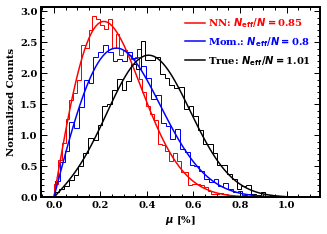

In [53]:
fig, ax2 = plt.subplots(figsize=(5,3.5))
N = 576215
colors = ["r","b","k"]
labels = ["NN","Mom.","True"]
adj = [1.07,1.00,1.01,0.85,0.80]
# for idx in range(3):
#     ax1.hist(mu0[:,idx]*100,bins=50,density=True,histtype="step",color=colors[idx], )
#     ax1.plot(dists[idx][0][:110],dists[idx][1][:110],color=colors[idx],
#              label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx]}")
    
for idx in range(2):
    ax2.hist(mu0[:,idx+3]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax2.plot(dists[idx+3][0][:110],dists[idx+3][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx+3]}")
ax2.hist(mu0[:,2]*100,bins=50,density=True,histtype="step",color="k")
ax2.plot(dists[2][0][:110],dists[2][1][:110],color=colors[2],
        label=f"{labels[2]}: $N_{{\mathrm{{eff}}}}/N = ${adj[2]}")
# ax2.hist(mu0[:,1]*100,bins=50,density=True,histtype="step",color="b",ls="--")
# ax2.plot(dists[1][0][:110],dists[1][1][:110],color=colors[2],
#         label=f"{labels[1]}: $N_{{\mathrm{{eff}}}}/N = ${adj[1]}")

# leg1 = ax1.legend()
leg2 = ax2.legend()
# ax1.set_xlabel(r"$\mu$ [%]",fontweight="bold")
# ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
# for line, text in zip(leg1.get_lines(), leg1.get_texts()):
#     text.set_color(line.get_color())
for line, text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())

plt.savefig("plots/" + "bootstrap_single" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

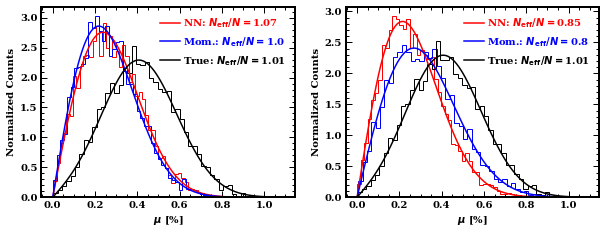

In [32]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,3.5), ncols=2)
N = 576215
colors = ["r","b","k"]
labels = ["NN","Mom.","True"]
adj = [1.07,1.00,1.01,0.85,0.80]
for idx in range(3):
    ax1.hist(mu0[:,idx]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax1.plot(dists[idx][0][:110],dists[idx][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx]}")
    
for idx in range(2):
    ax2.hist(mu0[:,idx+3]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax2.plot(dists[idx+3][0][:110],dists[idx+3][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx+3]}")
ax2.hist(mu0[:,2]*100,bins=50,density=True,histtype="step",color="k")
ax2.plot(dists[2][0][:110],dists[2][1][:110],color=colors[2],
        label=f"{labels[2]}: $N_{{\mathrm{{eff}}}}/N = ${adj[2]}")

leg1 = ax1.legend()
leg2 = ax2.legend()
ax1.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
for line, text in zip(leg1.get_lines(), leg1.get_texts()):
    text.set_color(line.get_color())
for line, text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())

plt.savefig("plots/" + "bootstrap_joint" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

In [4]:
def circular_std2(angles, axis):
    mean = 1/(np.sqrt(2)) * np.array([np.sum(np.cos(angles),axis=axis), np.sum(np.sin(angles),axis=axis),
                np.sum(np.cos(2*angles),axis=axis), np.sum(np.sin(2*angles),axis=axis)]) / angles.shape[axis]
    R = np.linalg.norm(mean,axis=0)
    return np.sqrt((1 - R**2) / (R * (4 - R**2)))

In [8]:
def MLError(angles, mu_hat, phi_hat):
    denom = (1 + mu_hat*np.cos(2*(angles - phi_hat)))**2
    I00 = np.sum(np.cos(2*(angles - phi_hat))**2 / denom)
    I01 = np.sum(2*np.sin(2*(angles - phi_hat)) / denom)
    I11 = np.sum(4*mu_hat*(mu_hat + np.cos(2*(angles - phi_hat)) ) / denom)
    I = np.array([[I00,I01],[I01,I11]])
    I_1 = np.linalg.inv(I)
    return np.sqrt(I_1[0,0]), np.sqrt(I_1[1,1]), I_1[0,1]/np.sqrt(I_1[0,0]*I_1[1,1])
    

3.0  <= Energy <=  3.0
2.0  <= Energy <=  2.0
6.0  <= Energy <=  6.5
(0.34516889808324563, -1.5612702636700997)
0.3452441424441561


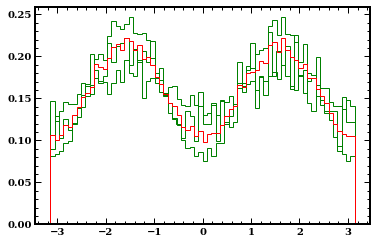

In [75]:
e1 = E[20]
e2 = E[20]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE1 = angles_mom[cut]
anglesE1 = anglesE1[:int(len(anglesE1)/8)]
plt.hist(anglesE1,bins=70,density=True,histtype="step",color="g")

e1 = E[10]
e2 = E[10]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE2 = angles_mom[cut]
plt.hist(anglesE2,bins=70,density=True,histtype="step",color="g")

e1 = E[50]
e2 = E[55]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE3 = angles_mom[cut]
anglesE3 = anglesE3[:int(len(anglesE3)/4)]
plt.hist(anglesE3,bins=70,density=True,histtype="step",color="g")


plt.hist(np.concatenate([anglesE1,anglesE2,anglesE3]),bins=70,density=True,histtype="step",color="r")

print(stokes(np.concatenate([anglesE1,anglesE2, anglesE3])))
print((stokes(anglesE1)[0] * len(anglesE1) + 
       stokes(anglesE2)[0]*len(anglesE2) +
        stokes(anglesE3)[0]*len(anglesE3) )  / (len(anglesE1) + len(anglesE2) + len(anglesE3)) ) 

In [19]:
def bootstrap2(angles, B, n_cpu=None):
    '''
    Non-parametric bootstrap
    angles -> distribution to be boostrapped (angles, angles_mom, angles_sim, moms, errors,)
    B -> number of boostrap samples
    '''
    t = NetTest(n_nets=15)
    if not n_cpu:
        n_cpu = os.cpu_count()
    print("Beginning parallelization on {} cores\n".format(n_cpu))
    chunks = []
    chunks += [np.random.choice(np.arange(len(angles[0])), len(angles[0]), replace=True) for _ in range(B)]
    def sub(idxs):
        A1 = (angles[0][idxs],angles[1][idxs],angles[2][idxs],angles[3][idxs],angles[4][idxs])
        mu, phi, _, _ = t.fit_mod(A1, method='stokes')
        return mu, phi,
    with mp.Pool(processes=n_cpu) as pool:
        results = pool.map(sub, chunks)
    print("DONE!")
    mus, phis, = zip(*results)
    MUs = np.concatenate([mus],axis=1)
    PHIs = np.concatenate([phis],axis=1)

    return MUs, PHIs

In [9]:
e1 = E[20]
e2 = E[30]
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim)

anglesE = angles[cut]
angles_momE = angles_mom[cut] 
angles_simE = angles_sim[cut]
momsE = moms[cut]
errorsE = errors[cut] 

errorsE = np.sqrt(errorsE.T**2 + 3.25*circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)**2).T

# A1 = (anglesE, angles_momE, angles_simE, momsE, errorsE,)
# mus2, phis2 = bootstrap2(A1,4000)

#errorsE = circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
anglesE = circular_mean(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
errorsE = np.sqrt(np.mean(np.reshape(errorsE**2,[len(errorsE),-1]),axis=1))

# anglesE = angles_momE
# errorsE = 1/momsE
print("Unweighted: ", stokes(anglesE))
print("Unweighted MDP: ", MDP99(len(anglesE), stokes(anglesE)[0]))

def mdp(lambd):
    mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, lambd)
    return MDP99(Neff,mu)

res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, res['x'])

print("mu_eff >>",mu)
print("N_eff / N >>", Neff / len(anglesE) )
print("MDP >>", res['fun'] )
print(r"lambda >>", res['x'])



Unweighted:  (0.3774857770872788, -1.568805371357936)
Unweighted MDP:  2.06066349400902
mu_eff >> 0.4500335843982394
N_eff / N >> 0.8531887245391518
MDP >> 1.8712861006150112
lambda >> 2.011119453137959


In [4]:
t = NetTest(n_nets=15)
n_pixels = 50

mu_list = []
phi_list = []
mu_err_list = []
phi_err_list = []

muW_list = []
muW1_list = []
muW3_list = []
phiW_list = []
phiW1_list = []
muW_err_list = []
muW1_err_list = []
muW3_err_list = []
phiW_err_list = []
phiW1_err_list = []
lambdas = []
neffs = []


# muW_err_bootstrap = []
# phiW_err_bootstrap = []


abs_acc = []
abs_acc_err = []
abs_acc_round = []
abs_mom_acc = []
abs_mom_acc_err = []
energy_acc = []
abs_sim_hist = []


it = iter(E)
ee = list(zip(it,it))
N = []
for e1, e2 in ee: #[(E[0],E[6]),(E[6],E[11]),(E[11],E[16]),(E[16],E[21]),(E[21],E[26]),
              #(E[26],E[31]),(E[31],E[36]),(E[36],E[41]), (E[41],E[46]),
            #(E[46],E[51]),(E[51],E[56]),(E[56],E[61]),(E[61],E[66]),(E[66],E[71]),(E[71],E[77])]:
    #print(e1 * (8.2 - 1.8 ) + 1.8 )
    #print(e1 * 1.6 + 3.44)
    print(e1, " <= Energy <= ",e2 )
    cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
    #pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
    anglesE = angles[cut]
    angles_momE = angles_mom[cut] 
    momsE = moms[cut]
    errorsE = errors[cut] 
    abs_ptsE = abs_pts[cut] 
    mom_abs_ptsE = mom_abs_pts[cut] 
    abs_pts_simE = abs_pts_sim[cut] 
    energiesE = energies[cut] 
    energies_simE = energies_sim[cut]
    angles_simE = angles_sim[cut]
    N.append(len(anglesE))
    
#     print(len(abs_ptsE), abs_ptsE.shape)
#     abs_sim_hist.append(np.mean(abs_pts_simE))
#     abs_mom_acc_hist = np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1)

    #abs_acc.append(np.sqrt(np.sum((abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2) / len(abs_ptsE)))
    #abs_acc = abs_ptsE*n_pixels - abs_pts_simE*n_pixels
    abs_acc.append(2*np.median(np.sqrt(np.sum((abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1))))
    #abs_acc_round.append(np.sqrt(np.sum((np.round(abs_ptsE*n_pixels) - abs_pts_simE*n_pixels)**2) / len(abs_ptsE)))
    #abs_acc_round.append(2*np.median(np.sqrt(np.sum((np.round(abs_ptsE*n_pixels) - abs_pts_simE*n_pixels)**2,axis=1))))
    #abs_mom_acc.append(np.sqrt(np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2) / len(mom_abs_ptsE)))
    #abs_mom_acc = mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels
    abs_mom_acc.append(2*np.median(np.sqrt(np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1))))
#     #energy_acc.append(np.mean(((energiesE - energies_simE)*((8.2 - 1.8 ) + 1.8))**2))
#     energy_acc.append(np.mean(((energiesE - energies_simE)*1.6)**2))

    print("Size: ", len(anglesE))
    
    errorsE = np.sqrt(errorsE.T**2/4 + circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)**2).T
#     errorsE = circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
    
#     #idxs = np.random.choice(np.arange(len(anglesE)),int(len(anglesE)/13))
    anglesE = circular_mean(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
    errorsE = np.sqrt(np.mean(np.reshape(errorsE**2,[len(errorsE),-1]),axis=1))
    A1 = (anglesE, angles_momE, angles_simE, momsE, errorsE,)
    
#     #plt.hist(angles_mom1,density=True,alpha=0.3,bins=50)
    mu, phi0, mu_err, phi0_err = t.fit_mod(A1, method='stokes')
    print(mu[0], " (NN) -- ", mu[1], " (Mom.) -- ",mu[2], " (True.) ")
    print(phi0[0], " (NN) -- ", phi0[1], " (Mom.) -- ",phi0[2], " (True.) ")
    mu_list.append(mu)
    phi_list.append(phi0)
    mu_err_list.append(mu_err)
    phi_err_list.append(phi0_err)   
    
    mu, phi0, mu_err, phi0_err = t.fit_mod(A1, method='weighted_MLE', error_weight=2.1)
    mu1, phi01, mu_err1, phi0_err1 = t.fit_mod(A1, method='weighted_MLE', error_weight=1.1)
#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, lambd)
#         return MDP99(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,20),method="bounded")
#     mu, phi0, Neff = weighted_stokes(anglesE, 1/errorsE, 2)
#     print("WEIGHTED_STOKES: ", mu, phi0)
#     lambdas.append(res["x"])
#     neffs.append(Neff/len(anglesE))

        
    print("MLE mu:", mu[0], " (NN) -- ", mu[1], " (Mom.) ")
    print("MLE Phi:", phi0[0], " (NN) -- ", phi0[1], " (Mom.) ")
    
    
    
# #     print("abs_pt:", abs_acc[-1])
# #     print("abs_pt_round:", abs_acc_round[-1])
# #     print("abs_mom_pt", abs_mom_acc[-1])
    
# #     print("energy:", energy_acc[-1])
    
    muW_list.append(mu)
    phiW_list.append(phi0)
    muW_err_list.append(mu_err)
    phiW_err_list.append(phi0_err)

    
    muW1_list.append(mu1)
    phiW1_list.append(phi01)
    muW1_err_list.append(mu_err1)
    phiW1_err_list.append(phi0_err1)
    
#     print(muW_list)
#     print(mu_list)
# #     print(muW_err_list)
# #     print(mu_err_list)
    


1.0  <= Energy <=  1.100000023841858
Size:  115934
Method: stokes

0.004828568609530566  (NN) --  0.005172586817945077  (Mom.) --  0.005687089263277803  (True.) 
-1.517100317632944  (NN) --  -1.1601648097311552  (Mom.) --  0.38480315789015096  (True.) 
Method: weighted_MLE



/home/groups/rwr/alpv95/tracksml/util/net_test.py:311: RuntimeWarning: invalid value encountered in log
  loglike_ipopt = lambda x: -np.sum((1 / error**error_weight) * np.log(1 + cs@x))


Moment cut at 1.25, leaving 0.805 of dataset

Moment cut at 1.25, leaving 0.805 of dataset

Method: weighted_MLE

Moment cut at 1.25, leaving 0.805 of dataset

Moment cut at 1.25, leaving 0.805 of dataset

MLE mu: 0.0050651845676482335  (NN) --  0.004496767026921456  (Mom.) 
MLE Phi: -1.4989552326998532  (NN) --  -1.4313020476198883  (Mom.) 
1.2000000476837158  <= Energy <=  1.2999999523162842
Size:  116078
Method: stokes

0.01152017784703304  (NN) --  0.007214082882944736  (Mom.) --  0.0047788358263108205  (True.) 
0.5724225485324094  (NN) --  0.46605095867213137  (Mom.) --  0.8722939078181919  (True.) 
Method: weighted_MLE

Moment cut at 1.20, leaving 0.810 of dataset

Moment cut at 1.20, leaving 0.810 of dataset

Method: weighted_MLE

Moment cut at 1.20, leaving 0.810 of dataset

Moment cut at 1.20, leaving 0.810 of dataset

MLE mu: 0.011432548384876808  (NN) --  0.011169402484096161  (Mom.) 
MLE Phi: 0.5491370992107042  (NN) --  0.4920918663272401  (Mom.) 
1.399999976158142  <= Ene

Moment cut at 1.28, leaving 0.811 of dataset

Moment cut at 1.28, leaving 0.811 of dataset

MLE mu: 0.004145105400836111  (NN) --  0.005173397258399465  (Mom.) 
MLE Phi: -0.4631367638012889  (NN) --  -0.4980607039705003  (Mom.) 
3.799999952316284  <= Energy <=  3.9000000953674316
Size:  116163
Method: stokes

0.00207349990655499  (NN) --  0.002318172453300849  (Mom.) --  0.003280664312746556  (True.) 
-0.22219400513018697  (NN) --  0.4535669173683326  (Mom.) --  0.03409237690986431  (True.) 
Method: weighted_MLE



/home/groups/rwr/alpv95/tracksml/util/net_test.py:200: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(I_1[0,0]), np.sqrt(I_1[1,1]), I_1[0,1]/np.sqrt(I_1[0,0]*I_1[1,1])


Moment cut at 1.32, leaving 0.807 of dataset

Moment cut at 1.32, leaving 0.807 of dataset

Method: weighted_MLE

Moment cut at 1.32, leaving 0.807 of dataset

Moment cut at 1.32, leaving 0.807 of dataset

MLE mu: 0.0009964090531178194  (NN) --  0.001830591986562471  (Mom.) 
MLE Phi: 1.120148876759639  (NN) --  -0.008661217795029465  (Mom.) 
4.0  <= Energy <=  4.099999904632568
Size:  116049
Method: stokes

0.007829469725176237  (NN) --  0.008170188831943355  (Mom.) --  0.006073745377980996  (True.) 
-0.23775576817757116  (NN) --  -0.3060356063205203  (Mom.) --  -0.19804408401986645  (True.) 
Method: weighted_MLE

Moment cut at 1.35, leaving 0.815 of dataset

Moment cut at 1.35, leaving 0.815 of dataset

Method: weighted_MLE

Moment cut at 1.35, leaving 0.815 of dataset

Moment cut at 1.35, leaving 0.815 of dataset

MLE mu: 0.009748950614152607  (NN) --  0.009212898302808368  (Mom.) 
MLE Phi: -0.33321928975446047  (NN) --  -0.19709493524726698  (Mom.) 
4.199999809265137  <= Energy <=  

Method: weighted_MLE

Moment cut at 2.13, leaving 0.814 of dataset

Moment cut at 2.13, leaving 0.814 of dataset

MLE mu: 0.005043040758245187  (NN) --  0.004047109355556687  (Mom.) 
MLE Phi: 0.06658984252581523  (NN) --  0.4134834736820753  (Mom.) 
6.599999904632568  <= Energy <=  6.699999809265137
Size:  116092
Method: stokes

0.004964212500491135  (NN) --  0.005446726687519074  (Mom.) --  0.005783716642834411  (True.) 
-0.7500764728266919  (NN) --  -0.4074255082606097  (Mom.) --  -0.13941022355616597  (True.) 
Method: weighted_MLE

Moment cut at 2.22, leaving 0.815 of dataset

Moment cut at 2.22, leaving 0.815 of dataset

Method: weighted_MLE

Moment cut at 2.22, leaving 0.815 of dataset

Moment cut at 2.22, leaving 0.815 of dataset

MLE mu: 0.005346866917700485  (NN) --  0.003181174586401897  (Mom.) 
MLE Phi: -0.9115179233509968  (NN) --  -0.882917481314639  (Mom.) 
6.800000190734863  <= Energy <=  6.900000095367432
Size:  116205
Method: stokes

0.007720998898699297  (NN) --  0.008

Text(0,0.5,'HPD [pixels]')

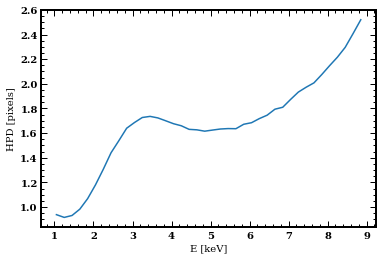

In [6]:
plt.plot(np.arange(1.05,9,0.2), abs_acc)
#plt.plot(np.arange(1.05,8.8,0.2), abs_mom_acc)
#plt.plot(np.arange(1.05,8.8,0.2), abs_acc_round)
plt.xlabel("E [keV]")
plt.ylabel("HPD [pixels]")

In [6]:
from scipy import interpolate

In [8]:
f = interpolate.interp1d(np.arange(1.05,9,0.2), abs_acc, kind="cubic")
print(f(2.7))
print(f(4.5))
print(f(6.4))
print(f(8.0))

1.564958958149478
1.627677693366709
1.7363452977703124
2.1294450343976448


In [ ]:
plt.plot(np.arange(1.05,8.8,0.2), np.sqrt(abs_acc))
plt.plot(np.arange(1.05,8.8,0.2), np.sqrt(abs_mom_acc))
plt.xlabel("E [keV]")
plt.ylabel("RMSE [pixels]")

In [ ]:
name = "abs_pts"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
#X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
#Y = [np.sqrt(np.array(abs_acc_round)),np.sqrt(np.array(abs_mom_acc)),np.array(err_round)]

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")
#ax.plot(np.arange(1.9,8.3,0.2), np.sqrt(np.array(abs_acc)),color='r',linewidth=2,linestyle="solid",label="NN")
ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid",label="NN" )
ax.plot(X[0], Y[1],color='b',linewidth=2,linestyle="solid" ,label="Mom.")
#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
ax.plot(X[1][1:], savgol_filter(Y[2][1:],5,3),color='k',linewidth=2,linestyle="solid",label="Bary.")

ax.plot([1.5,8.5],[2.43,2.43],linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [pixels]",fontweight="bold")
ax.set_ylim(0.5,3.0)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

np.save("plots/" + name, (X,Y))

In [28]:

Y_pol = [copy.copy(np.array(mu_list))[:,0],copy.copy(np.array(mu_list))[:,1],copy.copy(np.array(mu_list))[:,2],
     copy.copy(np.array(muW_list))[:,0],copy.copy(np.array(muW_list))[:,1],copy.copy(np.array(muW1_list))[:,0]]

Y_pol_err = [copy.copy(np.array(mu_err_list))[:,0],copy.copy(np.array(mu_err_list))[:,1],copy.copy(np.array(mu_err_list))[:,2],
     copy.copy(np.array(muW_err_list))[:,0],copy.copy(np.array(muW_err_list))[:,1],copy.copy(np.array(muW1_err_list))[:,0]]

Y_phi = [copy.copy(np.array(phi_list))[:,0],copy.copy(np.array(phi_list))[:,1],copy.copy(np.array(phi_list))[:,2],
     copy.copy(np.array(phiW_list))[:,0],copy.copy(np.array(phiW_list))[:,1],copy.copy(np.array(phiW1_list))[:,0]]

Y_phi_err = [copy.copy(np.array(phi_err_list))[:,0],copy.copy(np.array(phi_err_list))[:,1],copy.copy(np.array(phi_err_list))[:,2],
     copy.copy(np.array(phiW_err_list))[:,0],copy.copy(np.array(phiW_err_list))[:,1],copy.copy(np.array(phiW1_err_list))[:,0]]

In [32]:
Y_unpol = [copy.copy(np.array(mu_list))[:,0],copy.copy(np.array(mu_list))[:,1],copy.copy(np.array(mu_list))[:,2],
     copy.copy(np.array(muW_list))[:,0],copy.copy(np.array(muW_list))[:,1],copy.copy(np.array(muW1_list))[:,0]]

Y_unpol_err = [copy.copy(np.array(mu_err_list))[:,0],copy.copy(np.array(mu_err_list))[:,1],copy.copy(np.array(mu_err_list))[:,2],
     copy.copy(np.array(muW_err_list))[:,0],copy.copy(np.array(muW_err_list))[:,1],copy.copy(np.array(muW1_err_list))[:,0]]


/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[ -1.9523094  103.50495455]


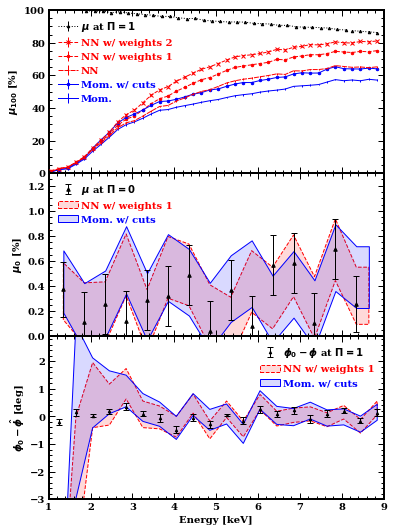

In [112]:
name = "modulation_review"
R1,T1,Yerr1 = np.load("plots/" + "modulation" + ".npy",allow_pickle=True)

true_angles = T1[2]
x_true = R1[0]
true_angles_err = Yerr1[2]

true,_,_,_ = np.linalg.lstsq(np.stack([x_true,np.ones(len(x_true))],axis=1),true_angles)
print(true)

X1 = np.arange(1.05,9.0,0.2)
X = np.arange(1.35,8.7,0.5)

# np.save("plots/" + name, (X,X1,Y_pol,Y_pol_err,Y_phi,Y_phi_err,Y_unpol,Y_unpol_err))
X, X1, Y_pol,Y_pol_err,Y_phi,Y_phi_err,Y_unpol,Y_unpol_err = np.load("plots/" + name + ".npy",allow_pickle=True)

fig, ax = plt.subplots(nrows=3,sharex=True,gridspec_kw={"hspace":0.0},figsize=(6,9))

errbr0 = ax[0].errorbar(x_true, true_angles ,color='k',yerr=true_angles_err, label= r"$\mu$ at $\Pi = 1$",linestyle='dotted',capsize=0, marker="^",markersize=2.5,linewidth=1)
true_fix = ax[0].plot(X1[36:], X1[36:]*true[0] + true[1], color='k', linestyle='dotted', marker="^",markersize=2.5,linewidth=1)
errbr1 = ax[0].errorbar(X1, Y_pol[5]*100, yerr=Y_pol_err[0]*100 ,color='r',linestyle='--', label=r"NN w/ weights 2",marker="x",markersize=3.2,zorder=30,capsize=0,linewidth=1)
errbr2 = ax[0].errorbar(X1, Y_pol[3]*100, yerr=Y_pol_err[0]*100 ,color='r',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=2.5,capsize=0,linewidth=1)
errbr4 = ax[0].errorbar(X1,Y_pol[0]*100, color='r',yerr=Y_pol_err[0]*100 , label= r"NN",linestyle=(0, (5, 1)),zorder=10,capsize=0,linewidth=1)
errbr5 = ax[0].errorbar(X1,Y_pol[4]*100, yerr=Y_pol_err[4]*100 ,color='b',linestyle='solid', label=r"Mom. w/ cuts",fmt="o",markersize=2.5,capsize=0,linewidth=1)
errbr6 = ax[0].errorbar(X1,Y_pol[1]*100, color='b',yerr=Y_pol_err[1]*100 , label= r"Mom.",linestyle='solid',capsize=0,linewidth=1)
#errbr7 = ax[0].plot(X1,np.array(muW_list)*100, color='k', linestyle='solid')

leg = ax[0].legend(loc = 2,)
lines = [errbr0.lines[0],errbr1.lines[0],errbr2.lines[0],errbr4.lines[0],errbr5.lines[0],errbr6.lines[0]]
for line, text in zip(lines, leg.get_texts()):
    text.set_color(line.get_color())
    
ax[0].set_ylabel(r"$\mu_{100}$ [%]",fontweight="bold")
ax[0].set_ylim(0.1,100.0)
ax[0].set_xlim(1.0,9.0)
ax[0].minorticks_on()


errbr0 = ax[1].errorbar(X,Y_unpol[2]*100 ,color='k',fmt="^",yerr=Y_unpol_err[2]*100, label= r"$\mu$ at $\Pi = 0$",ls=None, linewidth=1, marker="^",markersize=3.5,zorder=10)
#errbr1 = ax[1].errorbar(X+0.01, Y_unpol[3]*100,color='r',linestyle='--', label=r"NN w/ weights 1",marker="x",markersize=3,linewidth=1)
#errbr3 = ax[1].errorbar(X+0.02, Y_unpol[5]*100,color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=2.5,linewidth=1)
#errbr4 = ax[1].errorbar(X+0.03,Y_unpol[0]*100 ,color='r', label= r"NN",yerr=Y_unpol_err[0]*100,linestyle='solid',linewidth=1)
#errbr5 = ax[1].errorbar(X+0.04,Y_unpol[4]*100,color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=2.5,linewidth=1)
#errbr6 = ax[1].errorbar(X+0.05,Y_unpol[1]*100 , color='b',yerr=Y_unpol_err[1]*100, label= r"Mom.",linestyle='solid',linewidth=1)

X = np.append(X,X[-1]+0.3)
Y_unpol[3] = np.append(Y_unpol[3],Y_unpol[3][-1])
Y_unpol_err[0] = np.append(Y_unpol_err[0],Y_unpol_err[0][-1])
Y_unpol[4] = np.append(Y_unpol[4],Y_unpol[4][-1])
Y_unpol_err[4] = np.append(Y_unpol_err[4],Y_unpol_err[4][-1])
fill1 = ax[1].fill_between(X,(Y_unpol[3] + Y_unpol_err[0]/np.sqrt(0.95))*100,(Y_unpol[3] - Y_unpol_err[0]/np.sqrt(0.95))*100,facecolor=(1,0,0,0.15),edgecolor="r", label="NN w/ weights 1",linestyle="--")
fill2 = ax[1].fill_between(X,(Y_unpol[4] + Y_unpol_err[4])*100,(Y_unpol[4] - Y_unpol_err[4])*100,edgecolor="b",facecolor=(0,0,1,0.15), label="Mom. w/ cuts")

handles, labels = ax[1].get_legend_handles_labels()
order = [2,0,1]
leg = ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order])
lines = [fill1,fill2]
colors = ["r","b"]
for line, text, color in zip(lines, leg.get_texts()[1:],colors):
    text.set_alpha(line.get_alpha())
    text.set_color(color)

#ax[1].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[1].set_ylabel(r"$\mu_{0}$ [%]",fontweight="bold")
ax[1].set_ylim(0.0,1.3)
ax[1].set_xlim(1.0,8.1)
ax[1].minorticks_on()


errbr0 = ax[2].errorbar(X1[1::2], pi2_pi2((2*pi2_pi2(Y_phi[2]) - 2*np.pi/2))[1::2]*180/np.pi/2, fmt="^",color='k',yerr=Y_phi_err[2][1::2]*180/np.pi, label= r"$\phi_0 - \phi$ at $\Pi = 1$",ls=None,linewidth=1,markersize=2.5,zorder=10)
#errbr1 = ax[2].errorbar(X1[1::2]+0.01,  pi2_pi2((2*pi2_pi2(Y_phi[5]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',linestyle='--', label=r"NN w/ weights 2", marker='o',markersize=3,linewidth=1) #yerr=Y_phi_err[0][1::2]*180/np.pi
#errbr1 = ax[2].errorbar(X1[1::2]+0.01,  pi2_pi2((2*pi2_pi2(Y_phi[3]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',linestyle='--', label=r"NN w/ weights 1", marker='x',markersize=3,linewidth=1)
#errbr2 = ax[2].errorbar(X1[1::2]+0.02, pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',yerr=Y_phi_err[0][1::2]*180/np.pi, label= r"NN",linestyle='solid',linewidth=1) #,yerr=Y_phi_err[0][1::2]*180/np.pi
#errbr3 = ax[2].errorbar(X1[1::2]+0.03, pi2_pi2((2*pi2_pi2(Y_phi[4]) - 2*np.pi/2))[1::2]*180/np.pi/2, color='b',linestyle='--', label=r"Mom. w/ cuts",marker='o',markersize=3,linewidth=1) #yerr=Y_phi_err[4][1::2]*180/np.pi,
#errbr4 = ax[2].errorbar(X1[1::2]+0.04, pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 , color='b',yerr=Y_phi_err[1][1::2]*180/np.pi, label= r"Moments",linestyle='solid',linewidth=1)

fill1 = ax[2].fill_between(X1[1::2],pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 + Y_phi_err[0][1::2]*180/np.pi,
                   pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 - Y_phi_err[0][1::2]*180/np.pi,facecolor=(1,0,0,0.15),edgecolor="r", label="NN w/ weights 1",linestyle="--")
fill2 = ax[2].fill_between(X1[1::2],pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 + Y_phi_err[1][1::2]*180/np.pi,
                   pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 - Y_phi_err[1][1::2]*180/np.pi,facecolor=(0,0,1,0.15),edgecolor="b", label="Mom. w/ cuts")

handles, labels = ax[2].get_legend_handles_labels()
order = [2,0,1]
leg = ax[2].legend([handles[idx] for idx in order],[labels[idx] for idx in order])
lines = [fill1,fill2]
colors = ["r","b"]
for line, text, color in zip(lines, leg.get_texts()[1:],colors):
    text.set_alpha(line.get_alpha())
    text.set_color(color)

ax[2].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[2].set_ylabel(r"$\phi_0 - \hat{\phi}$ [deg]",fontweight="bold")
# ax.set_ylim(0.0,6)
ax[2].set_xlim(1.0,9.0)
ax[2].set_ylim(-3.0,2.9)
ax[2].minorticks_on()

plt.savefig("plots/" + "modulation_joint_review" + ".pdf",format="pdf")

Text(0,0.5,'RMSE [pixels]')

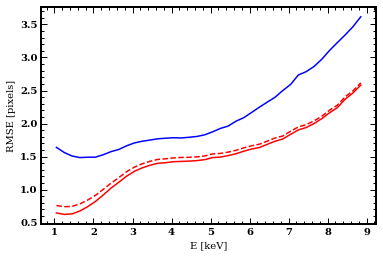

In [10]:
x = np.arange(1.05,9.0,0.2)
plt.plot(x,np.sqrt(np.array(abs_acc)), "r")
plt.plot(x,np.sqrt(np.array(abs_acc_round)), "r--")
plt.plot(x,np.sqrt(np.array(abs_mom_acc)),"b")
plt.xlabel("E [keV]")
plt.ylabel("RMSE [pixels]")

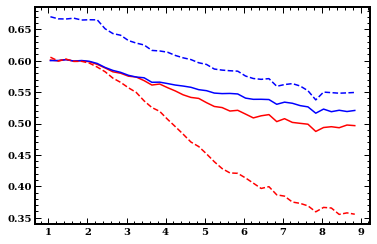

In [5]:
x = np.arange(1.05,9.0,0.2)
plt.plot(x,np.array(mu_err_list)[:,0]*100,"r")
plt.plot(x,np.array(mu_err_list)[:,1]*100,"b")
plt.plot(x,np.array(muW_err_list)[:,0]*100,"r--")
plt.plot(x,np.array(muW_err_list)[:,1]*100,"b--")

Text(0,0.5,'$\\mu$ [%]')

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


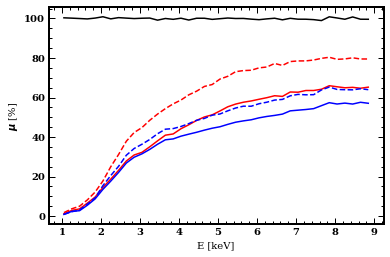

In [8]:
x = np.arange(1.05,8.9,0.2)
plt.plot(x, np.array(mu_list)[:,0]*100,"r")
plt.plot(x, np.array(mu_list)[:,1]*100,"b")
plt.plot(x, np.array(mu_list)[:,2]*100,"k")
plt.plot(x, np.array(muW_list)[:,0]*100,"r--")
plt.plot(x, np.array(muW_list)[:,1]*100,"b--")
# plt.ylim(0,20)
# plt.xlim(1,3)
plt.xlabel("E [keV]")
plt.ylabel(r"$\mu$ [%]")

In [ ]:
def GKing(r,sigma=9.85,r_c=7.57,eta=1.629,W=3.87e-4,N=2.574e-3):
    return W*np.exp(-r**2/(2*sigma**2)) + N*(1 + (r/r_c)**2)**(-eta)

In [ ]:
n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")

In [ ]:
fig,ax = plt.subplots()
name = "PSF_hist"
# X = np.load("plots/" + name + ".npy",allow_pickle=True)
X = [np.sqrt(abs_acc_hist)]

ax.set_xlabel(r"r [arcsec]")
ax.set_ylabel(r"Normalized Counts/r")
ax.set_ylim(0.0,1.1)
ax.set_xlim(0.0,2.57*4.5)
ax.minorticks_on()
#n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")
start = (bins[1] - bins[0]) / 2
width = (bins[1] - bins[0])

x = np.array([start + i*width for i in range(500)])
y = n / (np.pi*x)
y /= y[0]

ax.plot(np.linspace(0,12,500), y, color='b',linestyle="solid", label="NN")
ax.plot(np.arange(0,12,0.1),(1/0.002961)*GKing(np.arange(0,12,0.1)), color="k",linestyle=":",label="PSF 2.98keV")
print(GKing(np.arange(0,12,0.1))[0])

leg = ax.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
#leg.get_texts()[1].set_color("r")
plt.savefig("plots/" + name + ".pdf",format="pdf")

np.save("plots/" + name, X)


In [ ]:
fig,ax = plt.subplots()
X = np.load("plots/" + name + ".npy",allow_pickle=True)
name = "PSF_histlog"

ax.set_xlabel(r"r [arcsec]")
ax.set_ylabel(r"Normalized Counts/r")
# ax.set_ylim(0.0,1.1)
ax.set_xlim(0.001,10)
ax.set_yscale("log")
ax.set_xscale("log")
ax.minorticks_on()
#n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")
start = (bins[1] - bins[0]) / 2
width = (bins[1] - bins[0])

x = np.array([start + i*width for i in range(500)])
y = n / (np.pi*x)
y /= y[0]

ax.plot(np.linspace(0,12,500), y, color='b',linestyle="solid", label="NN")
ax.plot(np.arange(0,12,0.1),(1/0.002961)*GKing(np.arange(0,12,0.1)), color="k",linestyle=":",label="PSF 2.98keV")
print(GKing(np.arange(0,12,0.1))[0])

leg = ax.legend(loc = 3,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
#leg.get_texts()[1].set_color("r")
plt.savefig("plots/" + name + ".pdf",format="pdf")


In [2]:
with fits.open(home_dir + "real_data/systematic_UnpFF_DU2.fits", memmap=False) as hdu:
    print(hdu.info())
    Q = hdu[1].data
    U = hdu[2].data
    ENE = hdu[3].data
    PHA = hdu[4].data

Filename: /home/groups/rwr/alpv95/tracksml/real_data/systematic_UnpFF_DU2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  Q             1 ImageHDU         9   (100, 100, 6)   float64   
  2  U             1 ImageHDU         9   (100, 100, 6)   float64   
  3  ENERGIES      1 ImageHDU         7   (6,)   float64   
  4  PHA           1 ImageHDU         7   (0,)      
None


In [4]:
ENE

array([2.041, 2.306, 2.675, 3.092, 3.708, 5.956])

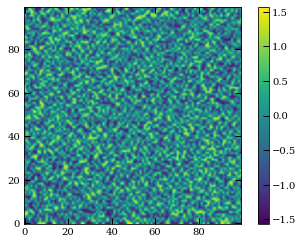

In [55]:
idx = 0
plt.imshow(0.5*np.arctan2(U[idx],Q[idx]),origin='lower',interpolation='gaussian')
plt.colorbar()

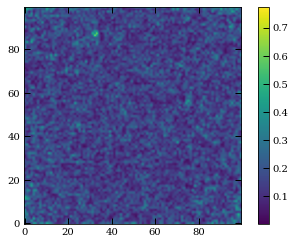

In [56]:
plt.imshow(np.sqrt(Q[idx]**2+U[idx]**2),origin='lower',interpolation='gaussian')
plt.colorbar()

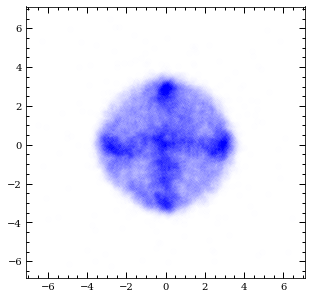

In [82]:
fig, ax = plt.subplots(figsize=(5,5))
ax.minorticks_on()
plt.scatter(B[5][:,0],B[5][:,1], c='b',alpha=0.0055 )

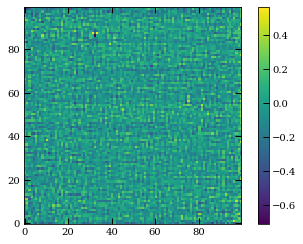

In [39]:
plt.imshow(Q[idx],origin='lower')
plt.colorbar()

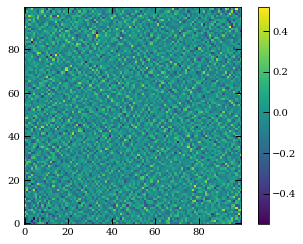

In [40]:
plt.imshow(U[idx],origin='lower')
plt.colorbar()

In [ ]:
with fits.open(home_dir + "data/gen4_paper/gen4_3p8.fits", memmap=False) as hdu:
    sim_data = hdu[3].data

In [ ]:
with fits.open(home_dir + "data/gen4_paper/gen4_3p8_recon.fits", memmap=False) as hdu:
    data = hdu[1].data

In [ ]:
momshex = (data['TRK_M2L'] / data['TRK_M2T'])
angles_simhex = sim_data["PE_PHI"]
angles_momhex = data["DETPHI"]
mom_abs_ptshex = np.column_stack((data['DETX'],data['DETY']))
abs_ptshex = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))

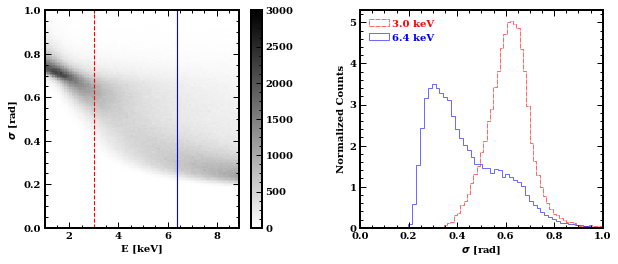

In [99]:
name = "error_dist"
#X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
X = energies_sim
Y1 = np.sqrt(errors.T**2/4 + circular_std(np.reshape(angles,[len(angles),-1]),axis=1)**2).T
Y = np.sqrt(np.mean(np.reshape(Y1**2,[len(Y1),-1]),axis=1))
cut = Y <= 1.0
Y = Y[cut]
X = X[cut]


fig,(ax1,ax2) = plt.subplots(figsize=(10,4),ncols=2,gridspec_kw={"wspace":0.3})
e = 3.0
e2 = 6.4

# plt.subplot(211)
hist = ax1.hist2d(X, Y, bins=(80, 120), 
                  cmap=plt.cm.binary, vmax=3000,)
ax1.set_ylim((0.0,1.0))
ax1.axvline(e,linestyle="--",color='r',label=r"{} keV".format(e),linewidth=1.1)
ax1.axvline(e2,linestyle="solid",color='b',label=r"{} keV".format(e2),linewidth=1.1)
fig.colorbar(hist[3],ax=ax1)

ax1.set_xlabel(r"E [keV]",fontweight='bold')
ax1.set_ylabel(r"$\sigma$ [rad]",fontweight="bold")
# leg = ax1.legend(loc = 1,)
# for line, text in zip(leg.get_lines(), leg.get_texts()):
#     text.set_color(line.get_color())


cut = np.round(X,3) == e
cut2 = np.round(X,3) == e2
hist = ax2.hist(Y[cut], bins=50,density=True,color='r',
                alpha=0.58, label=r"{} keV".format(e),histtype="step", linestyle=(0, (5, 1)))
hist2 = ax2.hist(Y[cut2], bins=50,density=True,color='b',
                 alpha=0.58, label=r"{} keV".format(e2),histtype="step")
ax2.set_xlim((0.0,1.0))
leg = ax2.legend(loc = 2,)

ax2.set_xlabel(r"$\sigma$ [rad]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight='bold')

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")
# np.save("plots/" + name, (X,Y))

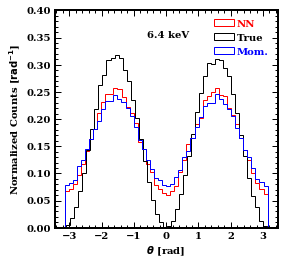

In [32]:
name = "SIRhist"
fig, ax1 = plt.subplots(figsize=(4,4))
e = E[54]
cut = (energies_sim >= e) * (energies_sim <= E[57])

hist1 = ax1.hist(circular_mean1(angles[cut],axis=(1,2)),bins=50, density=True, label=r"NN",color="r",histtype="step")
hist2 = ax1.hist(angles_sim[cut],bins=50, density=True, label=r"True",color="k",histtype="step")
hist3 = ax1.hist(angles_mom[cut],bins=50, density=True, label=r"Mom.",color="b",histtype="step")
leg = ax1.legend(loc=1)
ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.4))
ax1.text(-0.6,0.35,r"{} keV".format(np.round(e,2)))

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)
    
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

In [7]:
Y1 = (angles,angles_sim,angles_mom,energies_sim)

In [4]:
Y0 = (angles,angles_sim,angles_mom,energies_sim)

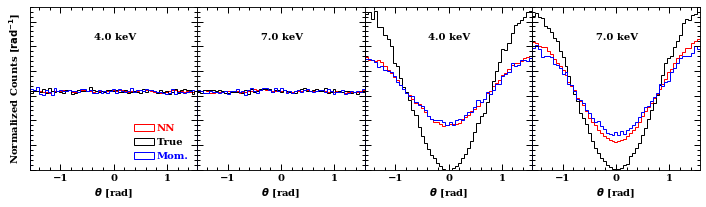

In [16]:
name = "angle01_dist_flat"
X0 = Y0[-1]
X1 = Y1[-1]

fig, ax = plt.subplots(figsize=(12,3), ncols=4, sharex=True, sharey=True, gridspec_kw={"hspace":0.0,"wspace":0.0})
(ax1,ax2,ax3,ax4) = ax.flat
e = 3.9; e1 = 4.1
e2 = 6.9; e3 = 7.1

cut = (np.round(X0,3) >= e) * (np.round(X0,3) <= e1)
hist1 = ax1.hist(pi2_pi2(np.ndarray.flatten(Y0[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
hist2 = ax1.hist(pi2_pi2(Y0[1][cut]),bins=57,density=True,label=r"True",color="k",histtype="step")
hist3 = ax1.hist(pi2_pi2(Y0[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
leg = ax1.legend(loc="lower right")
#ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.5))
ax1.annotate(r"{} keV".format(4.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.minorticks_on()

cut = (np.round(X0,3) >= e2) * (np.round(X0,3) <= e3)
ax2.hist(pi2_pi2(np.ndarray.flatten(Y0[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
ax2.hist(pi2_pi2(Y0[1][cut]),bins=57,density=True,label=r"True",color="k",histtype="step")
ax2.hist(pi2_pi2(Y0[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
#ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax2.set_ylabel(r"Normalized Counts [$rad^{-1}$]",fontweight='bold')
ax2.annotate(r"{} keV".format(7.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax2.set_ylim((0.0,0.5))
ax2.set_xlim((-np.pi/2,np.pi/2))
ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax2.axes.yaxis.set_ticklabels([])
ax2.minorticks_on()

cut = (np.round(X1,3) >= e) * (np.round(X1,3) <= e1)
hist1 = ax3.hist(pi2_pi2(np.ndarray.flatten(Y1[0][cut])),bins=54,density=True,label=r"NN",color="r",histtype="step")
hist2 = ax3.hist(pi2_pi2(Y1[1][cut]),bins=54,density=True,label=r"True",color="k", histtype="step")
hist3 = ax3.hist(pi2_pi2(Y1[2][cut]),bins=54,density=True,label=r"Mom.",color="b",histtype="step")
#leg = ax1.legend()
ax3.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax3.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax3.set_ylim((0.0,0.66))
ax3.annotate(r"{} keV".format(4.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax3.minorticks_on()

cut = (np.round(X1,3) >= e2) * (np.round(X1,3) <= e3)
ax4.hist(pi2_pi2(np.ndarray.flatten(Y1[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
ax4.hist(pi2_pi2(Y1[1][cut]),bins=57,density=True,label=r"True",color="k", histtype="step")
ax4.hist(pi2_pi2(Y1[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
ax4.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax4.set_ylabel(r"p",fontweight='bold')
ax4.annotate(r"{} keV".format(7.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax4.set_ylim((0.0,0.66))
ax4.axes.yaxis.set_ticklabels([])
ax4.minorticks_on()

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")

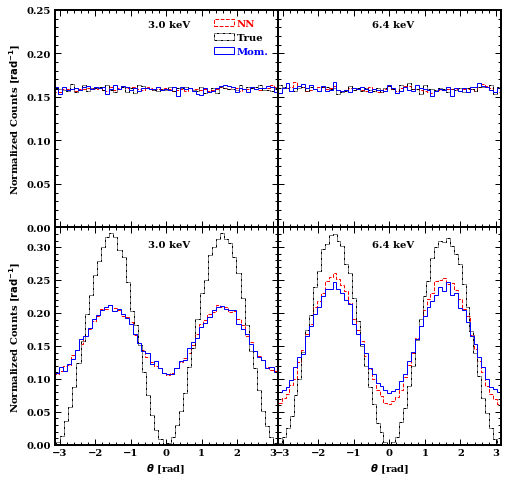

In [37]:
# name = "angle0_dist"
#X0,Y0 = np.load("plots/" + name + ".npy",allow_pickle=True)
# name = "angle1_dist"
# X1,Y1 = np.load("plots/" + name + ".npy",allow_pickle=True)
name = "angle01_dist"
# X = energies_sim * (8.2 - 1.8 ) + 1.8
# Y = [angles,angles_sim,angles_mom]
X0 = Y0[-1]
X1 = Y1[-1]

fig, ax = plt.subplots(figsize=(8,8), ncols=2,nrows=2, sharex=True, sharey=False, gridspec_kw={"hspace":0.0,"wspace":0.0})
(ax1,ax2,ax3,ax4) = ax.flat
e = 2.9; e1 = 3.1
e2 = 6.3; e3 = 6.5

cut = (np.round(X0,3) >= e) * (np.round(X0,3) <= e1)
hist1 = ax1.hist(np.ndarray.flatten(Y0[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
hist2 = ax1.hist(Y0[1][cut],bins=57,density=True,label=r"True",color="k",histtype="step",ls=(0, (3, 1, 1, 1)))
hist3 = ax1.hist(Y0[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
leg = ax1.legend()
#ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.25))
ax1.text(-0.5,0.23,r"{} keV".format(3.0))
ax1.minorticks_on()

cut = (np.round(X0,3) >= e2) * (np.round(X0,3) <= e3)
ax2.hist(np.ndarray.flatten(Y0[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
ax2.hist(Y0[1][cut],bins=57,density=True,label=r"True",color="k",histtype="step",ls=(0, (3, 1, 1, 1)))
ax2.hist(Y0[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
#ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax2.set_ylabel(r"Normalized Counts [$rad^{-1}$]",fontweight='bold')
ax2.text(-0.5,0.23,r"{} keV".format(6.4))
ax2.set_ylim((0.0,0.25))
ax2.set_xlim((-np.pi,np.pi))
ax2.axes.yaxis.set_ticklabels([])
ax2.minorticks_on()

cut = (np.round(X1,3) >= e) * (np.round(X1,3) <= e1)
hist1 = ax3.hist(np.ndarray.flatten(Y1[0][cut]),bins=54,density=True,label=r"NN",color="r",histtype="step",ls="--")
hist2 = ax3.hist(Y1[1][cut],bins=54,density=True,label=r"True",color="k", histtype="step",ls=(0, (3, 1, 1, 1)))
hist3 = ax3.hist(Y1[2][cut],bins=54,density=True,label=r"Mom.",color="b",histtype="step")
#leg = ax1.legend()
ax3.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax3.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax3.set_ylim((0.0,0.33))
ax3.text(-0.5,0.3,r"{} keV".format(3.0))
ax3.minorticks_on()

cut = (np.round(X1,3) >= e2) * (np.round(X1,3) <= e3)
ax4.hist(np.ndarray.flatten(Y1[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
ax4.hist(Y1[1][cut],bins=57,density=True,label=r"True",color="k", histtype="step",ls=(0, (3, 1, 1, 1)))
ax4.hist(Y1[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
ax4.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax4.set_ylabel(r"p",fontweight='bold')
ax4.text(-0.5,0.3,r"{} keV".format(6.4))
ax4.set_ylim((0.0,0.33))
ax4.axes.yaxis.set_ticklabels([])
ax4.minorticks_on()

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")
# np.save("plots/" + name, (X,Y))

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


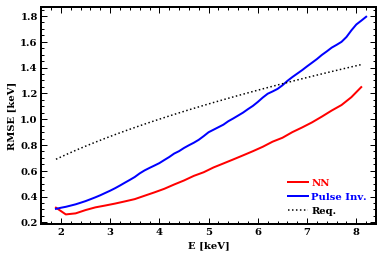

In [3]:
name = "energy"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
# X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
# Y = [np.sqrt(np.array(energy_acc)),np.array(E_total)]

fig, ax = plt.subplots()
ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid" ,label="NN")
ax.plot(X[1][1:], savgol_filter(Y[1],5,3)[1:],color='b',linewidth=2,linestyle="solid" ,label="Pulse Inv.")
ax.plot(np.arange(1.9,8.3,0.2),0.5*np.arange(1.9,8.3,0.2)**0.5,color='k',linestyle=':', label="Req.")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [keV]",fontweight="bold")
ax.set_xlim(1.6,8.4)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

#np.save("plots/" + name, (X,Y))

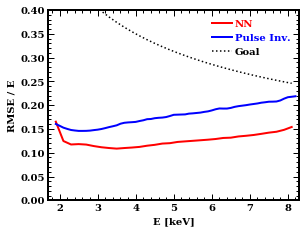

In [12]:
name = "energy_e"

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")
ax.plot(X[0], Y[0] / np.arange(1.9,8.3,0.2),color='r',linewidth=2,linestyle="solid" ,label="NN")
#ax.plot(X[0], np.sqrt(np.array(energy_acc)) / np.arange(1.9,8.3,0.2),color='r',linewidth=2,linestyle="--" ,label="NN2")
ax.plot(X[1][1:], savgol_filter(Y[1],5,3)[1:] / np.arange(1.8,8.3,0.1)[1:],color='b',linewidth=2,linestyle="solid" ,label="Pulse Inv.")
ax.plot(X[0],0.7*np.arange(1.9,8.3,0.2)**0.5 / np.arange(1.9,8.3,0.2),color='k',linestyle=':', label="Goal")


leg = ax.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE / E",fontweight="bold")
ax.set_ylim(0.0,0.4)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")


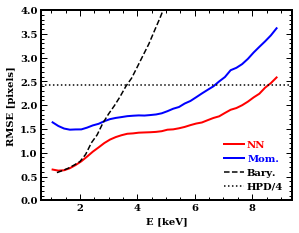

In [32]:
name = "abs_pts"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
#X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
#Y = [np.sqrt(np.array(abs_acc_round)),np.sqrt(np.array(abs_mom_acc)),np.array(err_round)]

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")

# ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid",label="NN" )
# ax.plot(X[0], Y[1],color='b',linewidth=2,linestyle="solid" ,label="Mom.")

ax.plot(np.arange(1.05,9.0,0.2), abs_acc,color='r',linewidth=2,linestyle="solid",label="NN" )
# ax.plot(np.arange(1.05,9.0,0.2), abs_acc_round,color='r',linewidth=2,linestyle="--")
ax.plot(np.arange(1.05,9.0,0.2), abs_mom_acc,color='b',linewidth=2,linestyle="solid" ,label="Mom.")



#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
# ax.plot(X[1][1:], savgol_filter(Y[2][1:],5,3),color='k',linewidth=2,linestyle="--",label="Bary.")
ax.plot(np.linspace(1,9,41)[1:],savgol_filter(np.array(bar_res)[1:],7,3),"k--",label="Bary.")
# ax.plot(np.linspace(1,9,41),savgol_filter(np.array(mom_res),11,5))

ax.axhline(2.43,linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [pixels]",fontweight="bold")
ax.set_ylim(0.0,4.0)
# ax.set_xlim(1.7,8.3)

plt.savefig("plots/" + name + ".pdf",format="pdf")

#np.save("plots/" + name, (X,Y))


In [ ]:
name = "abs_pts_arcsec"

fig, ax = plt.subplots()
#ax.semilogx(x, y, 'o', label = "data")
#ax.plot(np.arange(1.9,8.3,0.2), np.sqrt(np.array(abs_acc)),color='r',linewidth=2,linestyle="solid",label="NN")
ax.plot(np.arange(1.9,8.3,0.2), 2.57*np.sqrt(np.array(abs_acc_round)),color='r',linewidth=2,linestyle="solid",label="NN" )
ax.plot(np.arange(1.9,8.3,0.2), 2.57*np.sqrt(np.array(abs_mom_acc)),color='b',linewidth=2,linestyle="solid" ,label="Mom.")
#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
ax.plot(np.arange(1.8,8.3,0.1)[1:], 2.57*savgol_filter(np.array(err_round)[1:],5,3),color='k',linewidth=2,linestyle="solid",label="Bary.")

ax.plot([1.5,8.5],[2.57*2.43,2.57*2.43],linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]")
ax.set_ylabel(r"RMSE [arcsec]")
ax.set_ylim(2.0,8.0)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

# data_save = np.stack(X+Y)
# np.savetxt("plots/" + name + ".txt", data_save, delimiter=',')

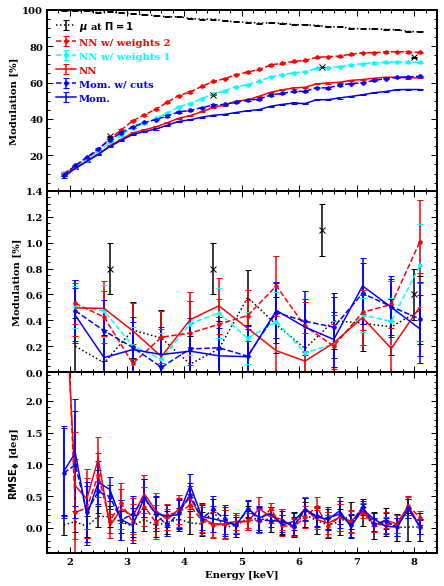

In [3]:
X, Y, Yerr, Yerr_bootstrap = np.load("plots/" + "modulation0" + ".npy", allow_pickle=True)
X1,Y1,Yerr1 = np.load("plots/" + "modulation" + ".npy",allow_pickle=True)

fig, ax = plt.subplots(nrows=3,sharex=True,gridspec_kw={"hspace":0.0},figsize=(7,10))

true_angles = Y1[2]
x_true = X1[0]
errbr0 = ax[0].errorbar(X1[0],Y1[2] ,color='k',yerr=Yerr1[2], label= r"$\mu$ at $\Pi = 1$",linestyle='dotted')
errbr1 = ax[0].errorbar(X1[0], Y1[3], yerr=Yerr1[3],color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=3.5)
errbr2 = ax[0].errorbar(X1[0], Y1[5], yerr=Yerr1[3],color='cyan',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=3.5)
#errbr3 = ax[0].errorbar(X1[0], Y1[6], yerr=Yerr1[3],color='m',linestyle='--', label=r"NN w/ weights 3",marker="o",markersize=3.5)
errbr4 = ax[0].errorbar(X1[0],Y1[0] ,color='r',yerr=Yerr1[0], label= r"NN",linestyle='solid')
errbr5 = ax[0].errorbar(X1[0],Y1[4], yerr=Yerr1[4],color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=3.5)
errbr6 = ax[0].errorbar(X1[0],Y1[1] , color='b',yerr=Yerr1[1], label= r"Mom.",linestyle='solid')

ax[0].errorbar(2.7, 30.5, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(4.5, 53.4, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(6.4, 68.6, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(8.0, 73.8, yerr=0.2, marker="x", markersize="6",color="k")

leg = ax[0].legend(loc = 2,)
#,errbr2.lines[0],errbr3.lines[0],
lines = [errbr0.lines[0],errbr1.lines[0],errbr2.lines[0],errbr4.lines[0],errbr5.lines[0],errbr6.lines[0]]
for line, text in zip(lines, leg.get_texts()):
    text.set_color(line.get_color())
#ax[0].set_xlabel(r"Energy [keV]")
ax[0].set_ylabel(r"Modulation [%]",fontweight="bold")
ax[0].set_ylim(0.5,100.0)
ax[0].set_xlim(1.6,8.4)
ax[0].minorticks_on()

errbr0 = ax[1].errorbar(X[0],Y[2] ,color='k',yerr=Yerr[2], label= r"$\mu$ at $\Pi = 0$",linestyle='dotted')
errbr1 = ax[1].errorbar(X[0], Y[5], yerr=Yerr_bootstrap[0],color='cyan',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=3.5)
#errbr2 = ax[1].errorbar(X[0], Y[6], yerr=Yerr_bootstrap[0],color='m',linestyle='--', label=r"NN w/ weights 3",marker="o",markersize=3.5)
errbr3 = ax[1].errorbar(X[0], Y[3], yerr=Yerr_bootstrap[0],color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=3.5)
errbr4 = ax[1].errorbar(X[0],Y[0] ,color='r',yerr=Yerr[0], label= r"NN",linestyle='solid')
errbr5 = ax[1].errorbar(X[0],Y[4], yerr=Yerr[4],color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=3.5)
errbr6 = ax[1].errorbar(X[0],Y[1] , color='b',yerr=Yerr[1], label= r"Moments",linestyle='solid')

ax[1].errorbar(2.7, 0.8, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(4.5, 0.8, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(6.4, 1.1, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(8.0, 0.6, yerr=0.2, marker="x", markersize="6",color="k")

#ax[1].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[1].set_ylabel(r"Modulation [%]",fontweight="bold")
ax[1].set_ylim(0.0,1.4)
ax[1].set_xlim(1.6,8.4)
ax[1].minorticks_on()

name = "phi"
X,Y,Yerr,Yerr_bootstrap = np.load("plots/" + name + ".npy",allow_pickle=True)

errbr0 = ax[2].errorbar(X[0],Y[2]  ,color='k',yerr=Yerr[2], label= r"$\mu$ at $\Pi = 1$",linestyle='dotted')
errbr1 = ax[2].errorbar(X[0], Y[3], yerr=Yerr_bootstrap[0] ,color='r',linestyle='--', label=r"NN w/ weights", marker='o',markersize=3.5)
errbr2 = ax[2].errorbar(X[0],Y[0] ,color='r',yerr=Yerr_bootstrap[0], label= r"NN",linestyle='solid')
errbr3 = ax[2].errorbar(X[0],Y[4], yerr=Yerr_bootstrap[0],color='b',linestyle='--', label=r"Mom. w/ cuts",marker='o',markersize=3.5)
errbr4 = ax[2].errorbar(X[0],Y[1] , color='b',yerr=Yerr_bootstrap[0], label= r"Moments",linestyle='solid')
ax[2].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[2].set_ylabel(r"$\rm{RMSE_{\phi}}$ [deg]",fontweight="bold")
# ax.set_ylim(0.0,6)
ax[2].set_xlim(1.6,8.4)
ax[2].set_ylim(-0.4,2.45)
ax[2].minorticks_on()


#plt.savefig("plots/" + "modulation_joint3" + ".pdf",format="pdf")

## Miscellaneous

In [2]:
df = pd.read_pickle("/home/groups/rwr/alpv95/tracksml/alphaflat2.pickle")


In [3]:
df

,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_2048_171.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_1024_151.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_4096_131.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_191.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_2048_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_4096_191.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_512_171.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_512_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_2048_91.ptmodel,...,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_512_131.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_512_191.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_4096_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_91.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_2048_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_171.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_151.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_1024_111.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_1024_191.ptmodel,733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_512_91.ptmodel
0,1187.014648,1339.261475,5927.922852,1941.265869,1775.363770,4284.508789,1211.814819,4881.751465,5481.915527,4456.011719,...,2991.538330,2197.428467,984.833740,2347.097412,786.739990,2569.262451,1720.001099,5150.586426,4866.559570,9107.063477
1,1.139175,1.136648,1.132899,1.135882,1.136456,1.144549,1.134990,1.143585,1.151671,1.162348,...,1.138815,1.138565,1.137480,1.136576,1.144449,1.136063,1.136416,1.141631,1.131914,1.138785
2,1.048589,1.047446,1.042249,1.045736,1.047163,1.054072,1.045095,1.055133,1.063160,1.071672,...,1.048799,1.048648,1.047130,1.047381,1.053769,1.046864,1.047147,1.051657,1.041539,1.048907
3,1.068780,1.066911,1.066599,1.065747,1.066068,1.071885,1.064765,1.071660,1.078907,1.086155,...,1.067168,1.066100,1.065839,1.069950,1.071272,1.066560,1.066244,1.074791,1.065983,1.072652
4,0.923423,0.922436,0.920449,0.920666,0.921049,0.925358,0.919824,0.929124,0.936920,0.941546,...,0.921120,0.920248,0.921461,0.924350,0.926617,0.921634,0.921120,0.931691,0.919839,0.927096
5,0.002906,0.002109,0.001911,0.002238,0.001743,0.001793,0.001597,0.003543,0.003265,0.003031,...,0.002245,0.001893,0.001511,0.002022,0.002301,0.001801,0.002010,0.003619,0.001532,0.002363
6,0.003527,0.003074,0.003000,0.002999,0.002741,0.002976,0.002608,0.003915,0.003690,0.003728,...,0.003192,0.003021,0.002437,0.003214,0.003019,0.002859,0.002838,0.003961,0.002738,0.003086
7,0.000227,0.000096,0.000191,0.000564,0.000116,0.000730,0.000586,0.000108,0.000119,0.000058,...,0.000370,0.000321,0.000662,0.000089,0.000151,0.000096,0.000099,0.000204,0.000185,0.000216
8,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,...,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450
9,0.546690,0.538713,0.528910,0.539541,0.537027,0.556951,0.539803,0.551947,0.566143,0.570022,...,0.537050,0.535107,0.542116,0.541327,0.545731,0.539859,0.537180,0.543914,0.530138,0.531648


In [4]:
net_set = set()
net_list = []

# nets = (df.loc[0] * df.loc[7] * df.loc[14] * df.loc[21] * df.loc[28] * df.loc[35] * df.loc[42] * df.loc[49] *
#        df.loc[3] * df.loc[10] * df.loc[17] * df.loc[24] * df.loc[31] * df.loc[38] * df.loc[45] * df.loc[52] *
#        df.loc[4] * df.loc[11] * df.loc[18] * df.loc[25] * df.loc[32] * df.loc[39] * df.loc[46] * df.loc[53]).sort_values().keys().to_list()

nets = (df.loc[1] * df.loc[2] * df.loc[3] * df.loc[4] ).sort_values().keys().to_list()

for i,net in enumerate(nets):
#     if "flat" not in net:
#         continue
    if net[:-11] not in net_set:
        net_set.add(net[:-11])
        net_list.append(net)
print("Best:",np.sort(df.loc[1])[1])
print("Worst:",np.sort(df.loc[1])[i])
print("Best:",np.sort(df.loc[2])[1])
print("Worst:",np.sort(df.loc[2])[i])
print(len(net_list))

Best: 1.1321676969528198
Worst: 1.1803274154663086
Best: 1.04166898670156
Worst: 1.0941260527986911
16


In [5]:
net_list

['733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_1024_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_4096_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_2048_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_512_171.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_1024_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_2048_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_4096_91.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_512_91.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_4096_91.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/mom_512_191.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_2048_91.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/RLRP_1024_91.ptmodel',
 '733flat1_mserrall2_expectile0p2_alpha0p8/models/m

In [64]:
df['733_mserrall1_2/models/mom_1024_91.ptmodel']

0    688.540161
1      1.378318
2      1.325019
3      1.405747
4      1.284813
5      0.007248
6      0.008121
7      0.000838
8      0.003450
9      0.305234
Name: 733_mserrall1_2/models/mom_1024_91.ptmodel, dtype: float64